# Predicting Liver Disease in Patients

## Busisness Case:

### Background:
> Liver disease is a significant global health concern, with rising incidence rates linked to lifestyle factors such as alcohol consumption, poor diet, and exposure to harmful substances.Liver diseases, including cirrhosis, hepatitis, and fatty liver disease, are among the leading causes of morbidity and mortality worldwide. The liver plays a vital role in detoxifying harmful substances, metabolizing nutrients, and producing essential proteins. The dataset provided contains records of 416 liver patients and 167 non-liver patients, offering a valuable resource for developing a predictive model.This business case proposes the development of a machine learning predictive model that leverages clinical and demographic data to identify patients at risk of liver disease. By enabling early diagnosis, the model aims to improve patient outcomes, reduce healthcare costs, and alleviate the burden on healthcare professionals.
### Problem Statement:
> The primary objective is to develop a machine learning model that can predict the likelihood of liver disease in patients based on their demographic and clinical features. The dataset includes various attributes that can help in predicting the presence or absence of liver disease. The model will classify patients into two categories: those with liver disease (target = 1) and those without liver disease (target = 2). Early identification of at-risk patients can lead to timely interventions, improving overall health outcomes.



# Domain Analysis : 
 > This domain analysis emphasizes the importance of understanding liver disease prediction and how clinical features are vital in diagnosing the disease. The dataset consists of 583 records with 416 patients suffering from liver disease and 167 patients without it. By utilizing machine learning models, healthcare providers can receive more accurate predictions, which will allow for better treatment decisions and improved patient outcomes.


In [5]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations and array handling
import matplotlib.pyplot as plt  # interactive visualizations
import seaborn as sns  # for statistical data visualization based on Matplotlib
import warnings  # to manage warning messages
from statsmodels.tools.sm_exceptions import ValueWarning  # to handle specific warnings
warnings.filterwarnings("ignore", category=ValueWarning) # Ignore warnings of type ValueWarning

In [6]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None) # Load the dataset from a CSV file
data  # Display the loaded DataFrame

0       1     2    3    4   5    6    7    8     9   10
0    65  Female   0.7  0.1  187  16   18  6.8  3.3  0.90   1
1    62    Male  10.9  5.5  699  64  100  7.5  3.2  0.74   1
2    62    Male   7.3  4.1  490  60   68  7.0  3.3  0.89   1
3    58    Male   1.0  0.4  182  14   20  6.8  3.4  1.00   1
4    72    Male   3.9  2.0  195  27   59  7.3  2.4  0.40   1
..   ..     ...   ...  ...  ...  ..  ...  ...  ...   ...  ..
578  60    Male   0.5  0.1  500  20   34  5.9  1.6  0.37   2
579  40    Male   0.6  0.1   98  35   31  6.0  3.2  1.10   1
580  52    Male   0.8  0.2  245  48   49  6.4  3.2  1.00   1
581  31    Male   1.3  0.5  184  29   32  6.8  3.4  1.00   1
582  38    Male   1.0  0.3  216  21   24  7.3  4.4  1.50   2

[583 rows x 11 columns]

In [7]:
# Assign meaningful column names
column_names = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin",  "Alkaline_Phosphotase", "Alamine_Aminotransferase", 
                "Aspartate_Aminotransferase", "Total_Proteins",  "Albumin", "Albumin_and_Globulin_Ratio", "Target"]

# Set the proper column names
data.columns = column_names
data

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0     65  Female              0.7               0.1                   187   
1     62    Male             10.9               5.5                   699   
2     62    Male              7.3               4.1                   490   
3     58    Male              1.0               0.4                   182   
4     72    Male              3.9               2.0                   195   
..   ...     ...              ...               ...                   ...   
578   60    Male              0.5               0.1                   500   
579   40    Male              0.6               0.1                    98   
580   52    Male              0.8               0.2                   245   
581   31    Male              1.3               0.5                   184   
582   38    Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  
0        3.3                        0.90       1  
1        3.2                        0.74       1  
2        3.3                        0.89       1  
3        3.4                        1.00       1  
4        2.4                        0.40       1  
..       ...                         ...     ...  
578      1.6                        0.37       2  
579      3.2                        1.10       1  
580      3.2                        1.00       1  
581      3.4                        1.00       1  
582      4.4                        1.50       2  

[583 rows x 11 columns]

## Dataset UnderstandingThe dataset includes various features that are clinical indicators of liver disease. Understanding the meaning of each feature is important for developing an effective model. 


### Dataset Overview
- **Total Records**: 583
- **Patients with Liver Disease**: 416 (Target = 1)
- **Patients without Liver Disease**: 167 (Target = 2)
- **Total Attributes**: 11 (including the target variable)

### Key Features in the Dataset:

| Column Name                        | Description                                                                 | Significance                                                                                     |
|------------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **Age**                            | The age of the patient.                                                    | Older patients may have a higher risk of liver disease due to cumulative exposure to risk factors. |
| **Gender**                         | The gender of the patient (Male or Female).                               | Gender can influence the prevalence and progression of liver diseases.                           |
| **Total Bilirubin**               | The total amount of bilirubin in the blood (mg/dL).                       | Elevated levels can indicate liver dysfunction, jaundice, or liver disease.                      |
| **Direct Bilirubin**              | The amount of direct (conjugated) bilirubin in the blood (mg/dL).        | High levels can indicate liver problems, particularly issues with bile excretion.                |
| **Alkaline Phosphatase**          | An enzyme found in the liver and bones.                                    | High levels can indicate liver disease, bile duct obstruction, or bone disorders.                |
| **Alamine Aminotransferase (ALT)**| An enzyme primarily found in the liver.                                    | Elevated ALT levels are associated with liver damage or inflammation.                            |
| **Aspartate Aminotransferase (AST)**| An enzyme found in the liver and other tissues.                          | Elevated AST levels can indicate liver damage but may also be found in other organs.             |
| **Total Proteins**                | The total amount of protein in the blood.                                  | Abnormal levels may indicate liver disease or other health issues.                               |
| **Albumin**                       | A protein made by the liver.                                              | Low albumin levels can indicate liver dysfunction.                                              |
| **Albumin and Globulin Ratio**    | The ratio of albumin to globulin in the blood.                            | An abnormal ratio may indicate liver disease or other conditions affecting protein levels.       |
| **Target**                        | Class label indicating the presence (1) or absence (2) of liver disease.  | This is the dependent variable that the predictive model aims to classify.

### Domain Expertise
Liver disease is commonly caused by excessive alcohol consumption, viral infections, obesity, or exposure to toxic substances. Clinical features, such as bilirubin levels, liver enzymes (ALT, AST), and albumin levels, play a critical role in diagnosing liver disease.
* **Bilirubin:** Elevated bilirubin levels indicate liver dysfunction, leading to jaundice and other symptoms.
* **ALT & AST:** High levels of these enzymes are commonly seen in patients with liver damage.
* **Albumin:** A low albumin level may indicate severe liver disease as the liver is responsible for producing albumin.                       |           |ical      |


# Basic Check :
#### Definition:
> A basic check is a preliminary assessment to ensure that a system, process, or dataset meets essential criteria. In data analysis, this includes verifying the structure of a dataset, such as checking for missing values, confirming data types, and ensuring the expected number of records. Basic checks help identify issues early and maintain quality before further analysis.


In [10]:
data.head() # Display the first 5 rows of the DataFrame

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Target  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

In [11]:
data.tail() # Display the last 5 rows of the DataFrame

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
578   60   Male              0.5               0.1                   500   
579   40   Male              0.6               0.1                    98   
580   52   Male              0.8               0.2                   245   
581   31   Male              1.3               0.5                   184   
582   38   Male              1.0               0.3                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  
578      1.6                        0.37       2  
579      3.2                        1.10       1  
580      3.2                        1.00       1  
581      3.4                        1.00       1  
582      4.4                        1.50       2

In [12]:
data.shape # Get the shape of the dataset (number of rows and columns)

(583, 11)

In [13]:
# Get a summary of statistical information about the dataset (mean, std, min, max, etc.)
data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio      Target  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

The .describe() method provides a quick overview of key statistics for numerical columns, including:
* **Count:** The number of non-null entries.
* **Mean:** The average value.
* **Standard Deviation (std):** A measure of the amount of variation or dispersion in the dataset.
* **Min/Max:** The minimum and maximum values in the dataset.
* **25th, 50th (median), and 75th Percentiles:** These values help understand the distribution of the data.

#### Analysis:
1. **Null Values**: The **Albumin_and_Globulin_Ratio** column has a low count, indicating missing values.
2. **Mean Values**: 
   - Lowest mean: **Albumin_and_Globulin_Ratio**.
   - Highest mean: **Alkaline_Phosphotase**.
3. **Standard Deviation**: 
   - Lowest: **Albumin_and_Globulin_Ratio** (less variability).
   - Highest: **Aspartate_Aminotransferase** (more variability).
4. **Min/Max Values**: 
   - Minimum: **Direct_Bilirubin**.
   - Maximum: **Aspartate_Aminotransferase**.nsferase.

In [15]:
data.describe(include="O") # Get a summary of categorical columns (object type), showing the count of unique values, top (most frequent), and frequency

Gender
count     583
unique      2
top      Male
freq      441


* **Count:** The number of non-null entries in the column.
* **Unique:** The number of distinct categories in the column.
* **Top:** The most frequently occurring category (the mode).
* **Freq:** The frequency of the most common category.

#### Analysis:
* there are no null values in Gender
* The Male category is dominant, with 441 occurrences, indicating an imbalance in gender representation in the dataset.

In [17]:
data.describe(include='all').T # Generate descriptive statistics for the DataFrame and transpose the result

count unique   top freq        mean         std  \
Age                         583.0    NaN   NaN  NaN   44.746141   16.189833   
Gender                        583      2  Male  441         NaN         NaN   
Total_Bilirubin             583.0    NaN   NaN  NaN    3.298799    6.209522   
Direct_Bilirubin            583.0    NaN   NaN  NaN    1.486106    2.808498   
Alkaline_Phosphotase        583.0    NaN   NaN  NaN  290.576329  242.937989   
Alamine_Aminotransferase    583.0    NaN   NaN  NaN   80.713551  182.620356   
Aspartate_Aminotransferase  583.0    NaN   NaN  NaN  109.910806  288.918529   
Total_Proteins              583.0    NaN   NaN  NaN     6.48319    1.085451   
Albumin                     583.0    NaN   NaN  NaN    3.141852    0.795519   
Albumin_and_Globulin_Ratio  579.0    NaN   NaN  NaN    0.947064    0.319592   
Target                      583.0    NaN   NaN  NaN    1.286449     0.45249   

                             min    25%    50%    75%     max  
Age                          4.0   33.0   45.0   58.0    90.0  
Gender                       NaN    NaN    NaN    NaN     NaN  
Total_Bilirubin              0.4    0.8    1.0    2.6    75.0  
Direct_Bilirubin             0.1    0.2    0.3    1.3    19.7  
Alkaline_Phosphotase        63.0  175.5  208.0  298.0  2110.0  
Alamine_Aminotransferase    10.0   23.0   35.0   60.5  2000.0  
Aspartate_Aminotransferase  10.0   25.0   42.0   87.0  4929.0  
Total_Proteins               2.7    5.8    6.6    7.2     9.6  
Albumin                      0.9    2.6    3.1    3.8     5.5  
Albumin_and_Globulin_Ratio   0.3    0.7   0.93    1.1     2.8  
Target                       1.0    1.0    1.0    2.0     2.0

In [18]:
data.info() # Get a concise summary of the dataset, showing the number of non-null values and the data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Proteins              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## EDA (Exploratory Data Analysis)
> Exploratory Data Analysis (EDA) is a crucial step in the data science process, especially for a project like liver disease prediction. EDA helps you understand the underlying patterns, detect anomalies, and gain insights into the data before applying machine learning algorithms.

#### Distributed in three parts:
* **Univariate Analysis**:- Univariate analysis is essential for gaining insights of individual variables, which can help in further analysis and decision-making.
* **Bivariate Analysis**:- Bivariate analysis is for understanding how two variables influence each other, which can help decision-making and in further analysis.
* **Multivariate Analysis**:- Multivariate analysis is for understanding the relation of multiple factors, to get more insights and also for decision-making in complex datasets.

In [20]:
# Iterate over each column in the 'data' object
for column in data:
    # Print the current column to the console
    print(column)

Age
Gender
Total_Bilirubin
Direct_Bilirubin
Alkaline_Phosphotase
Alamine_Aminotransferase
Aspartate_Aminotransferase
Total_Proteins
Albumin
Albumin_and_Globulin_Ratio
Target


### Univariate Analysis
>  **Definition:**
> 
> Univariate analysis involves examining one variable at a time to understand its distribution, central tendency, and spread. It is commonly performed on numerical and categorical variables.



In [22]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Target  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

### 1. Histogram (for numerical data)

Visualize the frequency distribution of numerical columns.

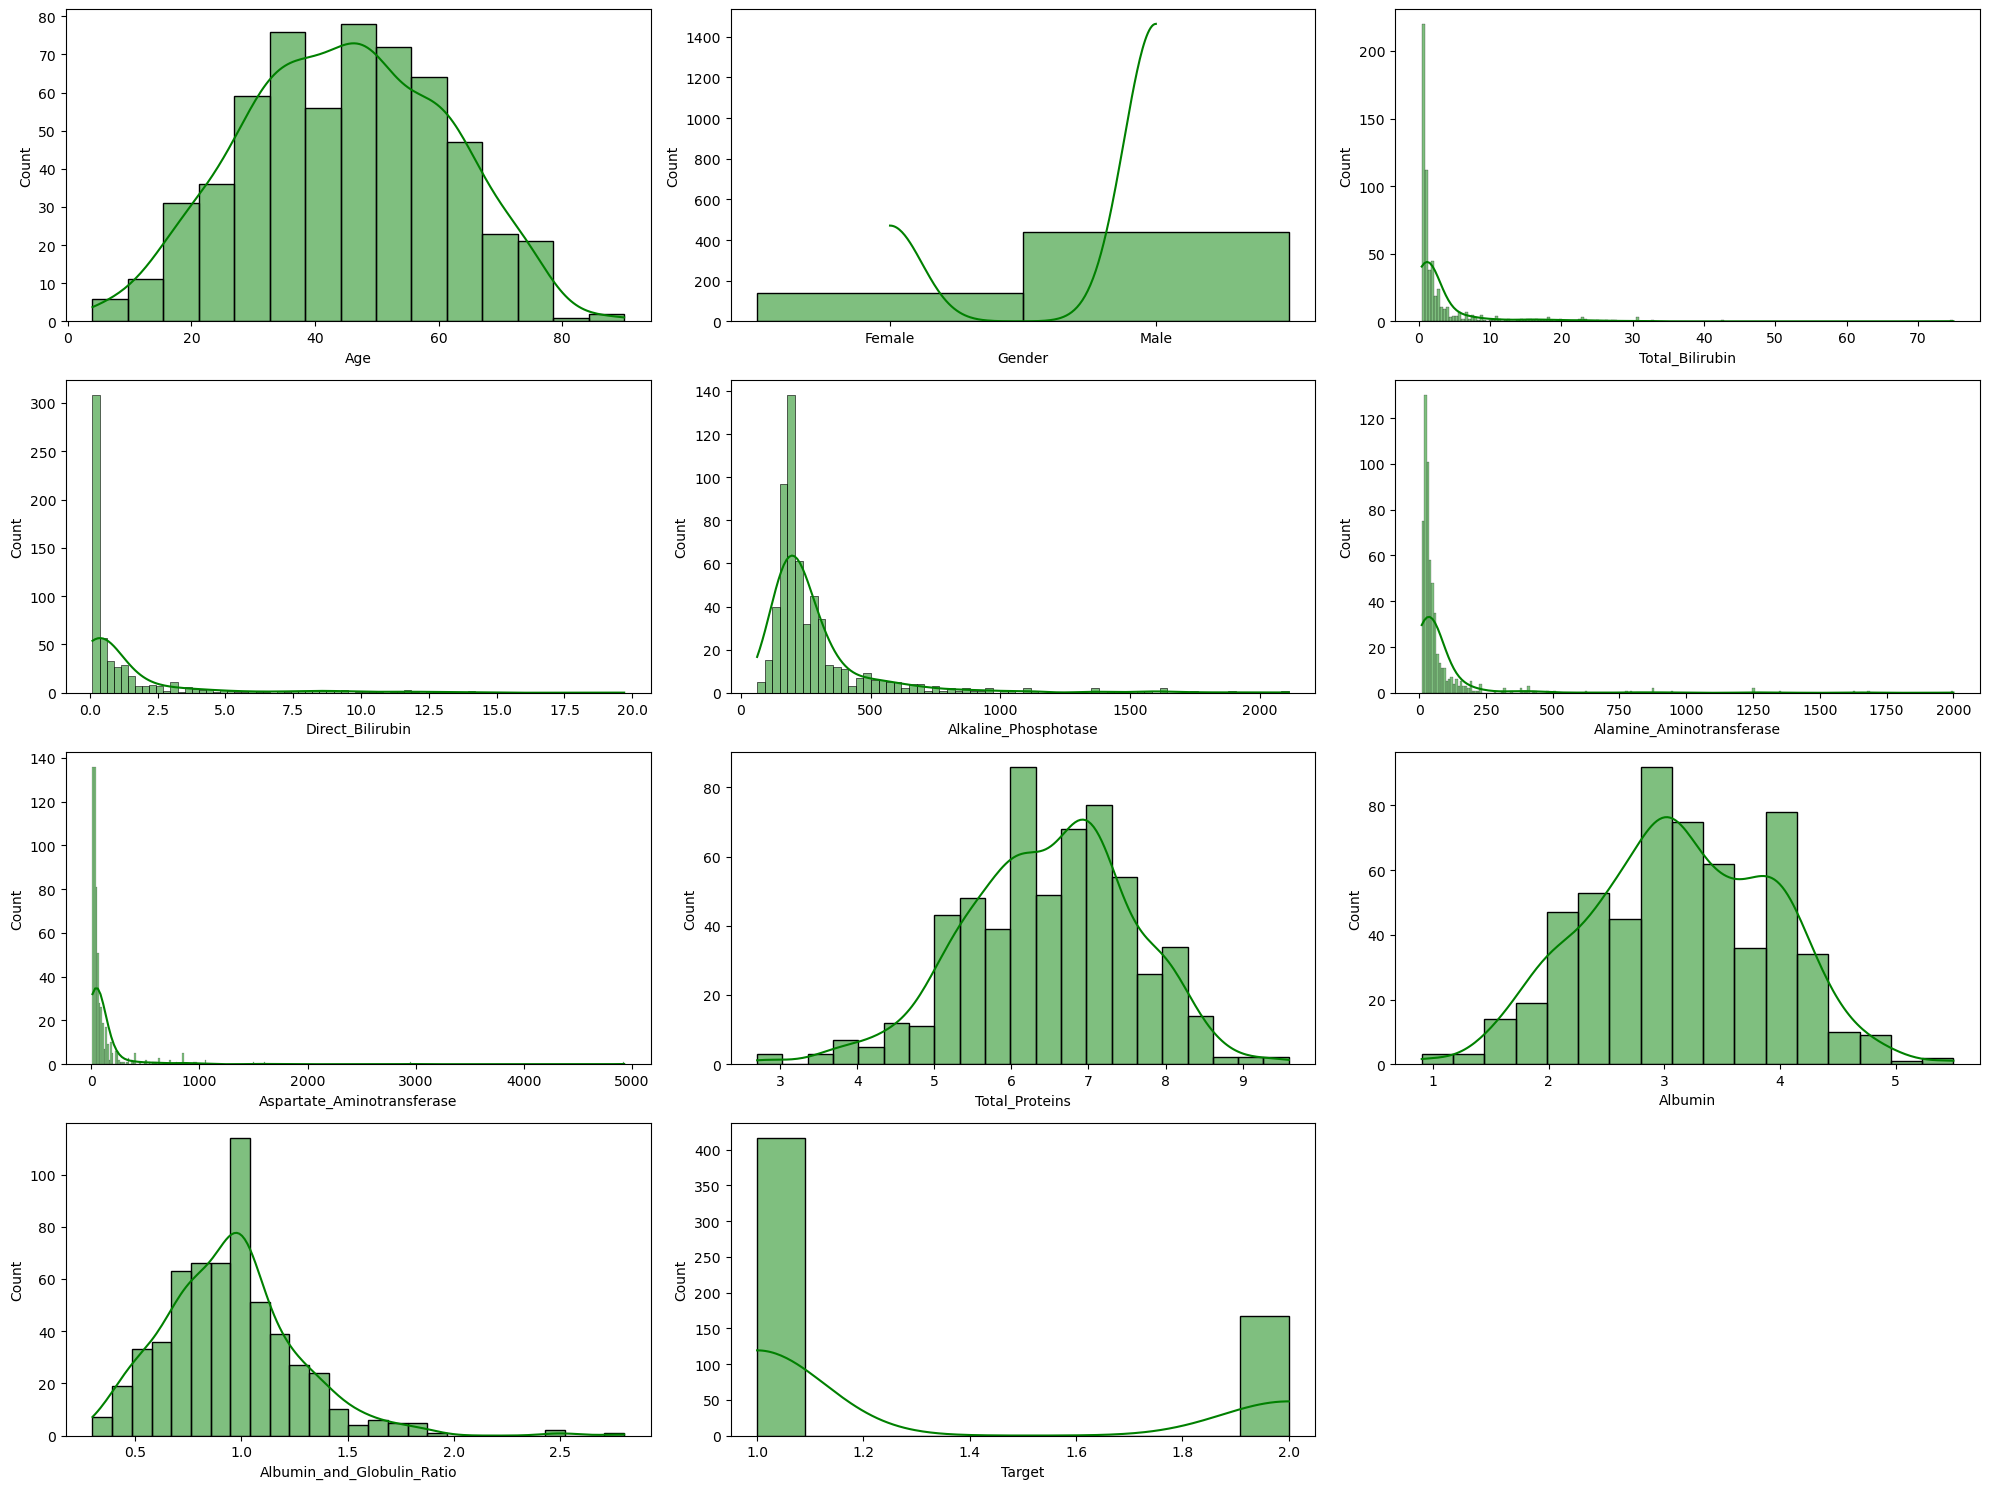

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20, 15))  

# Initialize plot index
plt_num = 1  

# Loop through each column in the DataFrame
for column in data.columns:
    if plt_num <= len(data.columns):  # Ensure within column count
        plt.subplot(4, 3, plt_num)  # Create subplot
        sns.histplot(data[column], kde=True, color="green")  # Plot histogram with KDE
        plt_num += 1  # Move to next plot

# Adjust layout and show plots
plt.tight_layout()  
plt.show()  


#### Analysis

- **Age Distribution**
  - Approximately normally distributed.
  - Peak around **45 years**.

- **Gender Distribution**
  - Highly skewed towards **males**.

- **Total Bilirubin Distribution**
  - **Right skew** with a large number of individuals having **low levels**.

- **Direct Bilirubin**
  - Majority have levels below **1.0 mg/dL**.
  - Small number have levels above **5 mg/dL**.

- **Alkaline Phosphatase**
  - Most individuals have levels below **200 IU/L**.
  - Smaller number have levels above **500 IU/L**.

- **Alanine Aminotransferase (ALT)**
  - Majority have levels below **50 IU/L**.
  - Small number have levels above **200 IU/L**.

- **Aspartate Aminotransferase (AST)**
  - **Highly skewed distribution** with many samples at low values and progressively fewer at higher values.

- **Total Proteins**
  - Roughly **bell-shaped** distribution.
  - Peak around **6.5**, indicating a normal distribution.

- **Albumin**
  - **Skewed distribution** with a peak around **3.5**.
  - Higher frequency of values in this range.

- **Albumin and Globulin Ratio**
  - **Right-skewed distribution** with a peak around **1.0**.
  - Majority of data points fall between **0.5 and 1.5**.oints fall between **0.5 and 1.5**.oints fall between **0.5 and 1.5**. points fall between **0.5 and 1.5**.e.the dataset. 


###  Frequency of age

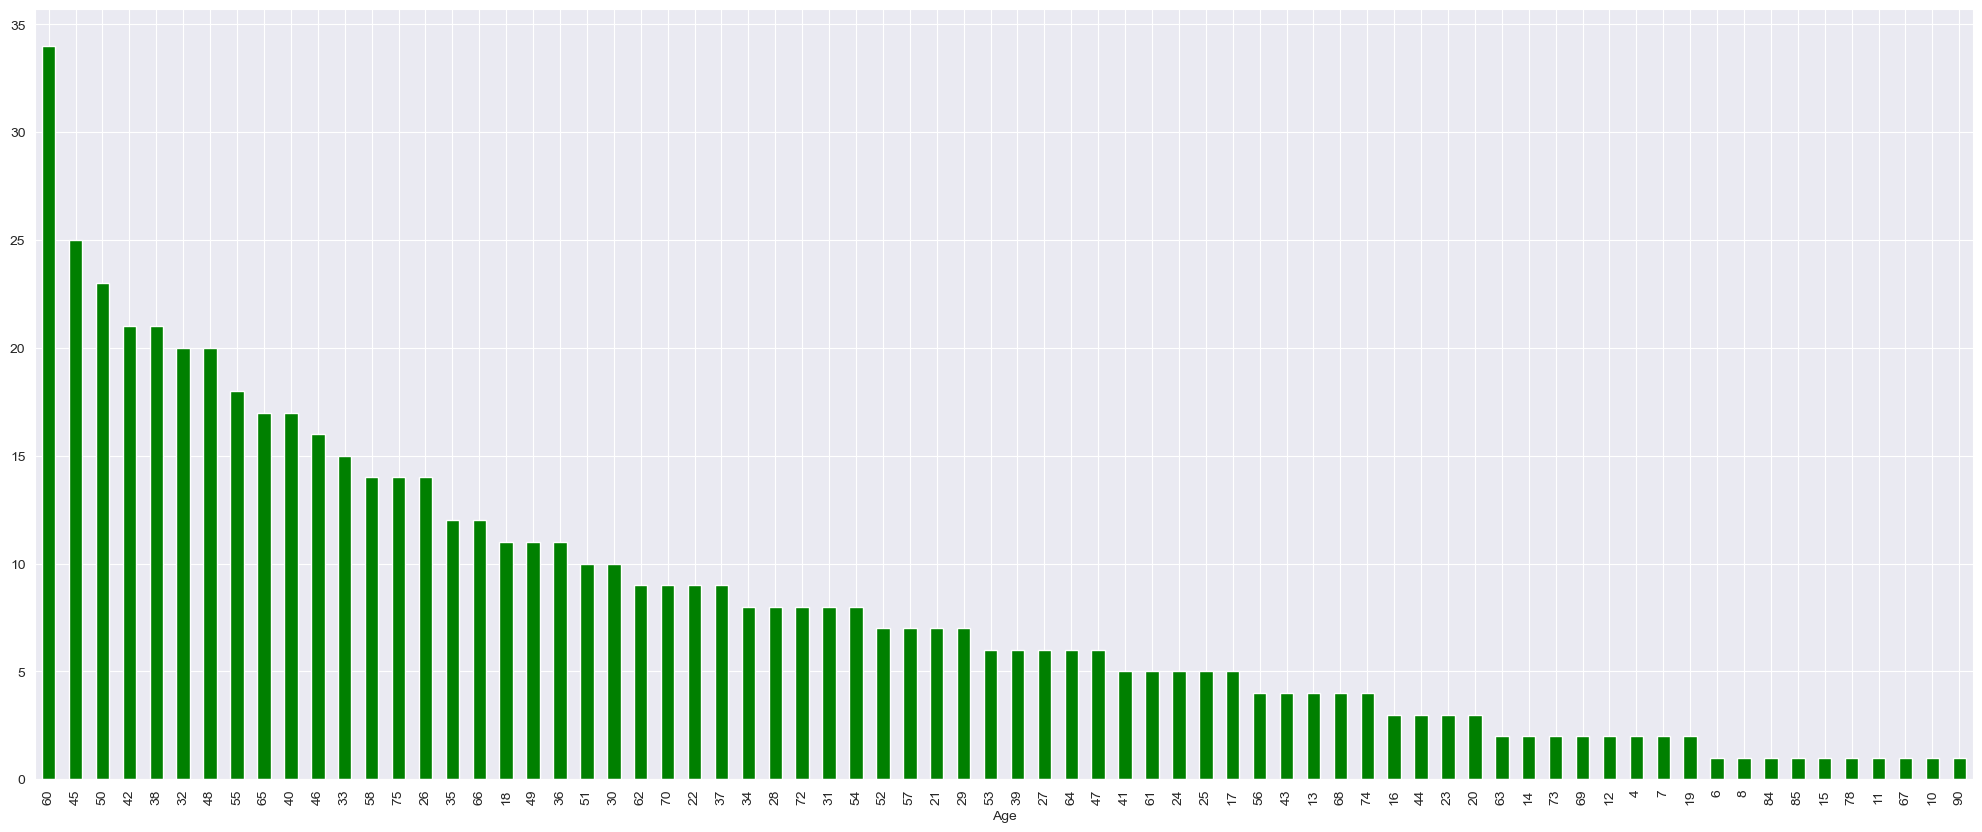

In [27]:
# Set plot style to darkgrid
sns.set_style('darkgrid')

# Create figure with specified size
plt.figure(figsize=(25, 10))

# Plot bar chart of age counts in green
data['Age'].value_counts().plot.bar(color='green')

# Show the plot
plt.show()

The bar chart represents the frequency of ages in a population. 
#### Analysis

1. **Most Frequent Age**: 60
2. **Least Frequent Ages**: 90, 87, and 86
3. The age range between **40 and 55** has the highest concentration of individuals, with a notable peak around **45**

This analysis provides insights into the age demographics and their distribution within the population.

### 2. Count Plots (Categorical vs Categorical)

> Count plots visualize the frequency of categories, and are useful for analyzing categorical variables like Gender and Target.

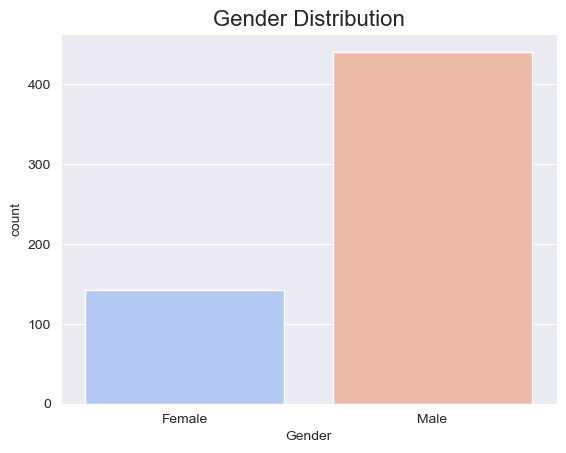

In [30]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the gender distribution
sns.countplot(x='Gender', hue='Gender', data=data, palette='coolwarm', legend=False)  # Create a count plot with gender as the category
plt.title("Gender Distribution", fontsize=16)  # Adding a title to the plot
plt.show()  # Displaying the plot


#### Analysis

- The graph shows the distribution of gender in the dataset.  
- **Male count:** Approximately **430**, indicating they are the majority.  
- **Female count:** Approximately **140**, significantly fewer compared to males.
0**.


## Bivariate Analysis
 >  
The purpose of bivariate analysis is to explore and understand the relationships between two variables, identifying patterns, correlations, or associations.


### 1. Scatter Plots (Numerical vs Numerical)
These plots show the relationship between numerical variables.

#### Age vs Total_Bilirubin

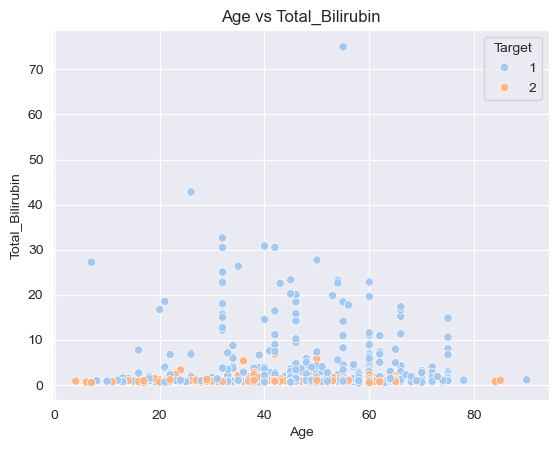

In [35]:
sns.scatterplot(x='Age', y='Total_Bilirubin', hue='Target', palette='pastel', data=data)
plt.title("Age vs Total_Bilirubin")
plt.show()

#### Analysis

- **No Strong Correlation:** Age does not show a clear linear relationship with total bilirubin levels.
- **Outlier:** One data point has a notably high total bilirubin level (~50).
- **Clusters:** Data points are concentrated in age ranges like 30-40 and 50-60 years.
ps.


#### Age vs Total_Proteins

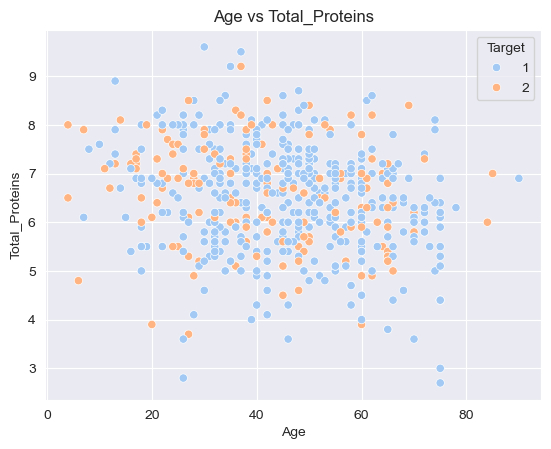

In [38]:
sns.scatterplot(x='Age', y='Total_Proteins', hue='Target', palette='pastel', data=data)
plt.title("Age vs Total_Proteins")
plt.show()

#### Analysis
- There is no clear linear relationship between Age and Total_Proteins.
- The data points seem to be scattered randomly.
- There's a slight tendency for higher Total_Proteins values in the age range of 30 to 60.

#### Total Bilirubin vs Direct Bilirubin 

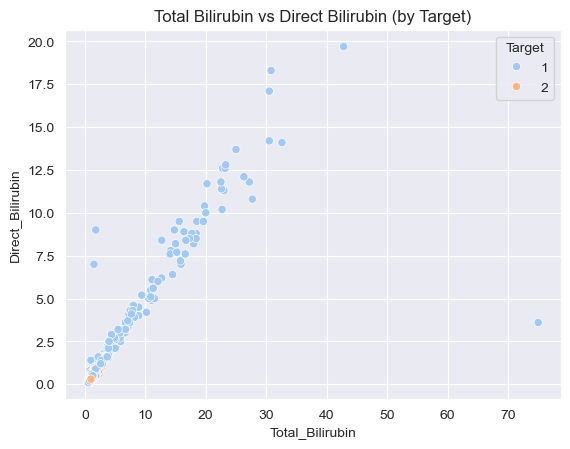

In [41]:
sns.scatterplot(x='Total_Bilirubin', y='Direct_Bilirubin', hue='Target', palette='pastel', data=data)
plt.title("Total Bilirubin vs Direct Bilirubin (by Target)")
plt.show()


#### Analysis

- **Positive Correlation:** Total bilirubin and direct bilirubin increase together.
- **Two Groups:** Target 1 has lower total bilirubin, and target 2 has higher levels.
- **Outlier:** One data point with high total bilirubin in target 1.


#### Albumin vs Total Proteins

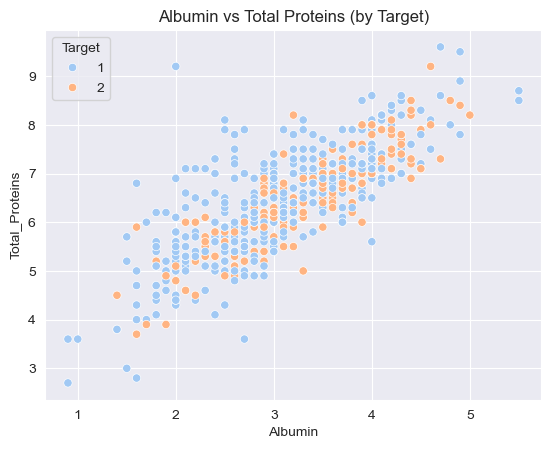

In [44]:
sns.scatterplot(x='Albumin', y='Total_Proteins', hue='Target', palette='pastel', data=data)
plt.title("Albumin vs Total Proteins (by Target)")
plt.show()


#### Analysis

- The scatter plot shows a **positive correlation** between Albumin and Total Proteins.
- As Albumin levels increase, the Total Proteins levels also tend to increase.

### 2. Bar Plots (Numerical vs Categorical)
> Bar plots are used to visualize the average of a numerical variable across different categories (such as Target, Gender, etc.)

#### Average Age by Target

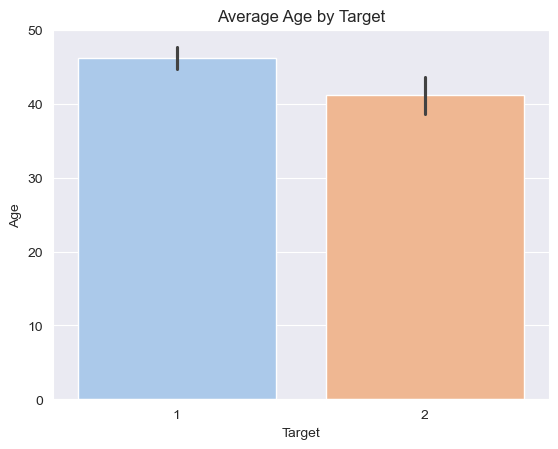

In [48]:
# Plotting the average age for each target class
sns.barplot(x='Target', y='Age', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Average Age by Target')
plt.show()

#### Analysis
- **Target 1:** The average age of people in target 1 is around 45 years old.
- **Target 2:** The average age of people in target 2 is around 41 years old.
- **Difference:** The average age in target 1 is slightly higher than the average age in target 2.

#### Gender Distribution by Age

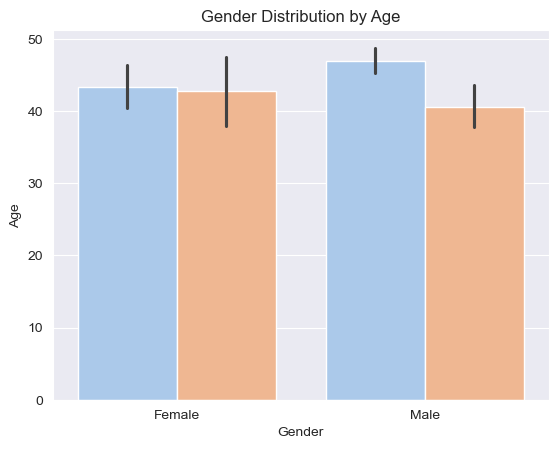

In [51]:
# Plotting the gender distribution in relation to the Age variable
sns.barplot(x='Gender', y='Age', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Gender Distribution by Age')
plt.show()

#### Analysis
- The average age of females is slightly lower than the average age of males.
- The standard deviation of age for females is larger than the standard deviation of age for males. This indicates that there is more variability in the age of females compared to males.

#### Total Bilirubin by Target

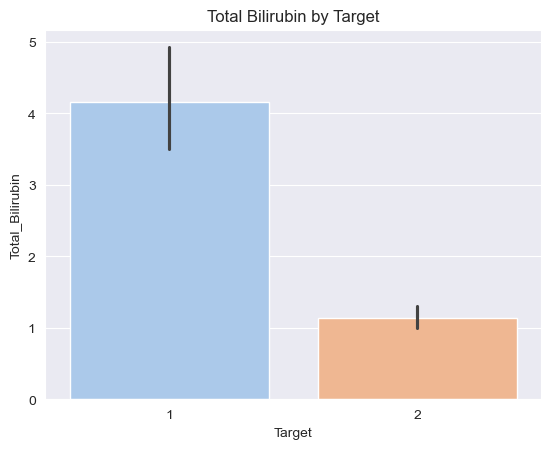

In [54]:
# Plotting the average Total Bilirubin levels for each target class
sns.barplot(x='Target', y='Total_Bilirubin', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Total Bilirubin by Target')
plt.show()

#### Analysis

- The Total Bilirubin level for **liver patients** is significantly **higher** than that for individuals without liver disease.  
- **Target group 1** has a mean Total Bilirubin level of approximately **4**, while **Target group 2** has a mean level of approximately **1**.  
- This suggests that the Total Bilirubin level could be a **good predictor** for classifying individuals into the two target groups
s.

#### Aspartate Aminotransferase by Target

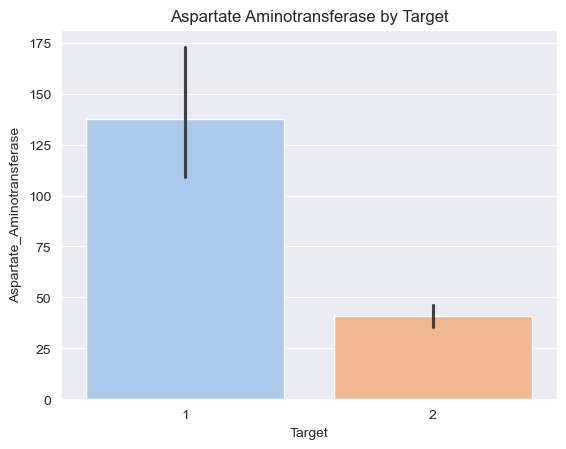

In [57]:
# Plotting the average Aspartate Aminotransferase (AST) levels for each target class
sns.barplot(x='Target', y='Aspartate_Aminotransferase', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Aspartate Aminotransferase by Target')
plt.show()

# - AST is another liver enzyme, similar to ALT, that can provide insight into liver damage. Differences in AST levels across the target classes might indicate which group experiences more liver damage.
# - A higher AST in one group may align with conditions such as liver diseases like cirrhosis or hepatitis.

#### Analysis

- **Higher AST Levels in Liver Patients**: Liver patients show significantly higher average Aspartate Aminotransferase (AST) levels than individuals without liver disease.  
- **Indicator of Liver Damage**: Elevated AST levels suggest increased instances of liver dysfunction or injury in liver patients.


#### Total Proteins by Target

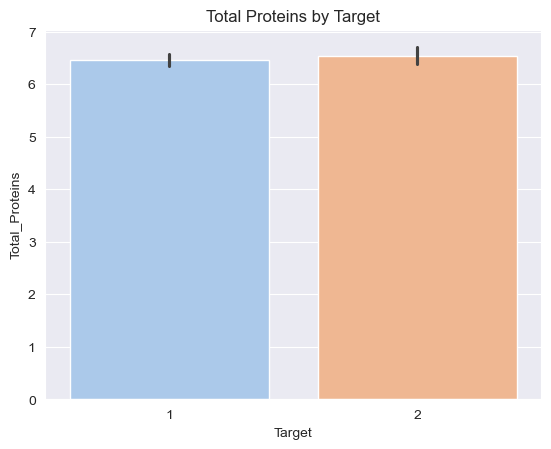

In [60]:
# Plotting the average Total Proteins levels for each target class
sns.barplot(x='Target', y='Total_Proteins', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Total Proteins by Target')
plt.show()

# - Protein levels in the blood reflect overall liver health, as the liver produces most blood proteins. By comparing total protein levels, we can see if liver-related diseases impact protein synthesis.
# - A significant difference in protein levels between target classes could indicate impaired liver function in one of the groups.

#### Analysis

- The chart shows that the average total protein levels for **liver patients** and **individuals without liver disease** are roughly the same, with individuals without liver disease having a slightly higher average.  
-  The minimal difference in average total protein levels suggests that this feature may not be a strong predictor for distinguishing between the two groups.


#### Albumin by Target

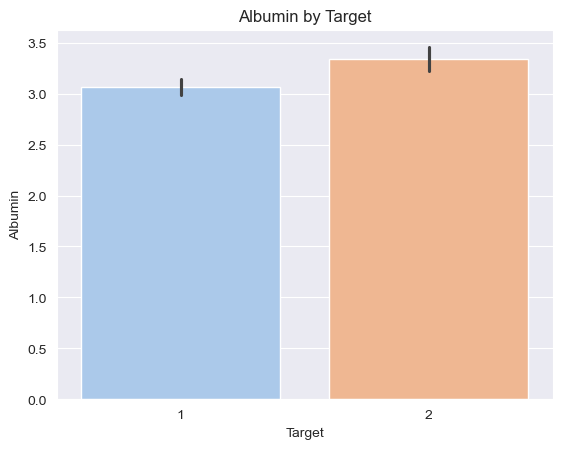

In [63]:
# Plotting the average Albumin levels for each target class
sns.barplot(x='Target', y='Albumin', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Albumin by Target')
plt.show()

# - Albumin is a liver protein that decreases when liver function is impaired. This plot shows whether albumin levels differ between target classes.
# - Lower albumin levels in a group may suggest more severe liver dysfunction or malnutrition in that group.

#### Analysis

- **Observation:** The plot shows a difference in average albumin levels between **liver patients** and **individuals without liver disease**.  
  - **Liver patients**: Average albumin level is **~3.0**.  
  - **Individuals without liver disease**: Average albumin level is **~3.3**.

- **Potential Interpretation:** Lower albumin levels in liver patients suggest potential liver dysfunction or poorer health compared to individuals without liver disease.


#### Albumin and Globulin Ratio by Target

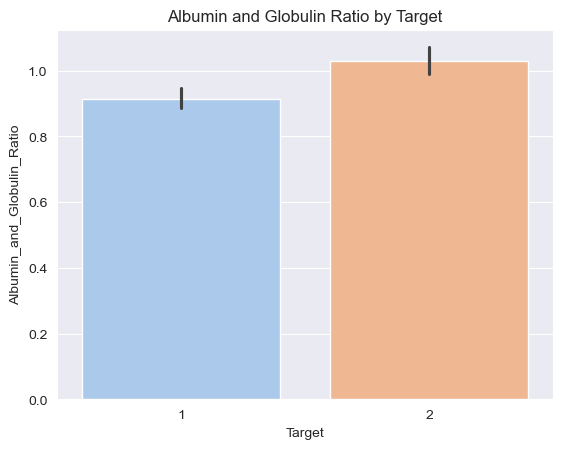

In [66]:
# Plotting the average Albumin and Globulin Ratio levels for each target class
sns.barplot(x='Target', y='Albumin_and_Globulin_Ratio', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Albumin and Globulin Ratio by Target')
plt.show()

# - The Albumin/Globulin ratio can help in identifying liver dysfunction. Low ratios are often seen in patients with liver disease.
# - If the ratio differs significantly between target classes, it might indicate that liver function is impaired in one of the groups.

#### Analysis
- This indicates that liver disease patients (group "1") may have a lower **Albumin and Globulin Ratio** than those without liver disease (group "2").
- the lower **Albumin and Globulin Ratio** could be a sign of liver dysfunction or damage.
- the higher **Albumin and Globulin Ratio** could indicate better liver function or overall health.


#### Insights on Liver Health Indicators  

**Liver Function Indicators**  
- Features like **Bilirubin**, **Albumin**, and **liver enzymes** serve as strong indicators of liver health.  
- Bar plots reveal significant differences in these indicators between the target classes, aiding in identifying potential liver disease or dysfunction.  

**Gender Impact**  
- The **Gender vs. Target** plot helps evaluate whether gender influences the target classes. While gender may not be as critical as liver function indicators, it can still provide valuable insights.  

**Albumin and Bilirubin Levels**  
- **Lower Albumin** levels or **higher Bilirubin** levels are often linked to liver disease.  
- Bar plots provide a clear visualization of these trends and their prevalence in specific target classes.  

**Protein Levels**  
- **Reduced total protein levels** can reflect liver dysfunction.  
- Exploring the relationship between **Total Proteins** and target classes can yield deeper insights into liver health within each group.
ss the groups.


### 4. Rel Plots (Numerical vs Categorical with Hue)
> Rel plots help visualize the relationship between numerical variables, optionally using color (hue) for categorical variables (such as Target).

#### Total Bilirubin vs Albumin by Target

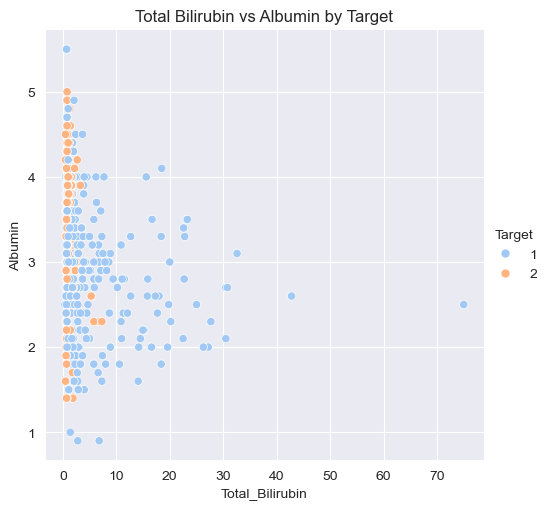

In [71]:
# Rel Plot: Total Bilirubin vs Albumin
sns.relplot(x='Total_Bilirubin', y='Albumin', hue='Target', palette='pastel', data=data)
plt.title("Total Bilirubin vs Albumin by Target")
plt.show()

#### Analysis
- Patients with higher **Total Bilirubin** levels tend to have lower **Albumin** levels.  
- This suggests a **negative correlation** between the two variables, indicating that as **Total Bilirubin** increases, **Albumin** levels decrease.

### Multivariate Analysis (Multiple Variable Analysis)

>  
Multivariate analysis examines the relationships between more than two variables simultaneously. This approach helps in understanding the complex interactions between multiple factors that may influence the outcome variable. In the context of liver disease, multivariate analysis can reveal how combinations of features like **Bilirubin**, **Albumin**, **liver enzymes**, and **protein levels** interact to impact the presence or severity of liver disease. By exploring these relationships, we can better identify patterns, correlations, and potential predictors for liver disease classification.


#### 1. Violin Plot:
Violin plots show the distribution of a variable across different categories.

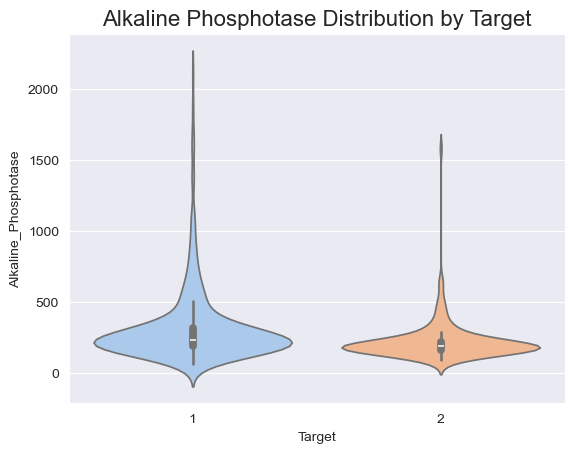

In [75]:
# Violin plot for Alkaline Phosphotase vs Target
sns.violinplot(x='Target', y='Alkaline_Phosphotase', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Alkaline Phosphotase Distribution by Target', fontsize=16)

# Insight:
# - Alkaline Phosphatase (ALP) levels are often elevated in liver diseases, particularly cholestasis or bile duct disorders.
# - The liver disease group (Target=1) might show higher and more variable levels compared to the healthy group.

plt.show()


#### Analysis

**Distribution of Alkaline Phosphatase Levels:**  
- **Liver patients (Target=2):** Show a wider range of **Alkaline Phosphatase** levels compared to **non-liver patients (Target=1)**.

**Possible Correlation:**  
- There might be a correlation between higher **Alkaline Phosphatase** levels and liver disease, but further analysis is required to confirm.


#### Alamine Aminotransferase Distribution by Target

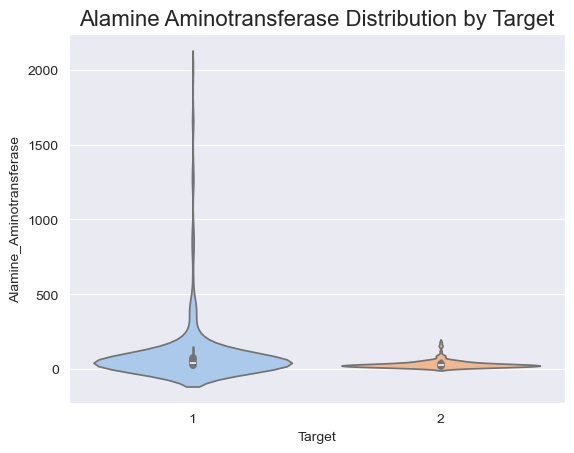

In [78]:
# Violin plot for Alamine Aminotransferase vs Target
sns.violinplot(x='Target', y='Alamine_Aminotransferase', hue='Target', data=data, palette='pastel', legend=False)
plt.title('Alamine Aminotransferase Distribution by Target', fontsize=16)

# Insight:
# - Alanine Aminotransferase (ALT) is a sensitive marker for liver cell injury, and we expect elevated ALT levels in the liver disease group.
# - The healthy group (Target=2) should show lower and more consistent ALT levels.

plt.show()


#### Analysis

**Different Distributions:**  
- **Group 1 (Target=1):** Higher **ALT** levels with many outliers.  
- **Group 2 (Target=2):** Lower and more symmetrical **ALT** levels.  

**Interpretation:**  
- **ALT levels** may predict the **Target** variable, with higher levels linked to liver-related conditions.


### 2. Pairplot:
>  Pairplots show pairwise relationships between variables, which can help identify patterns.

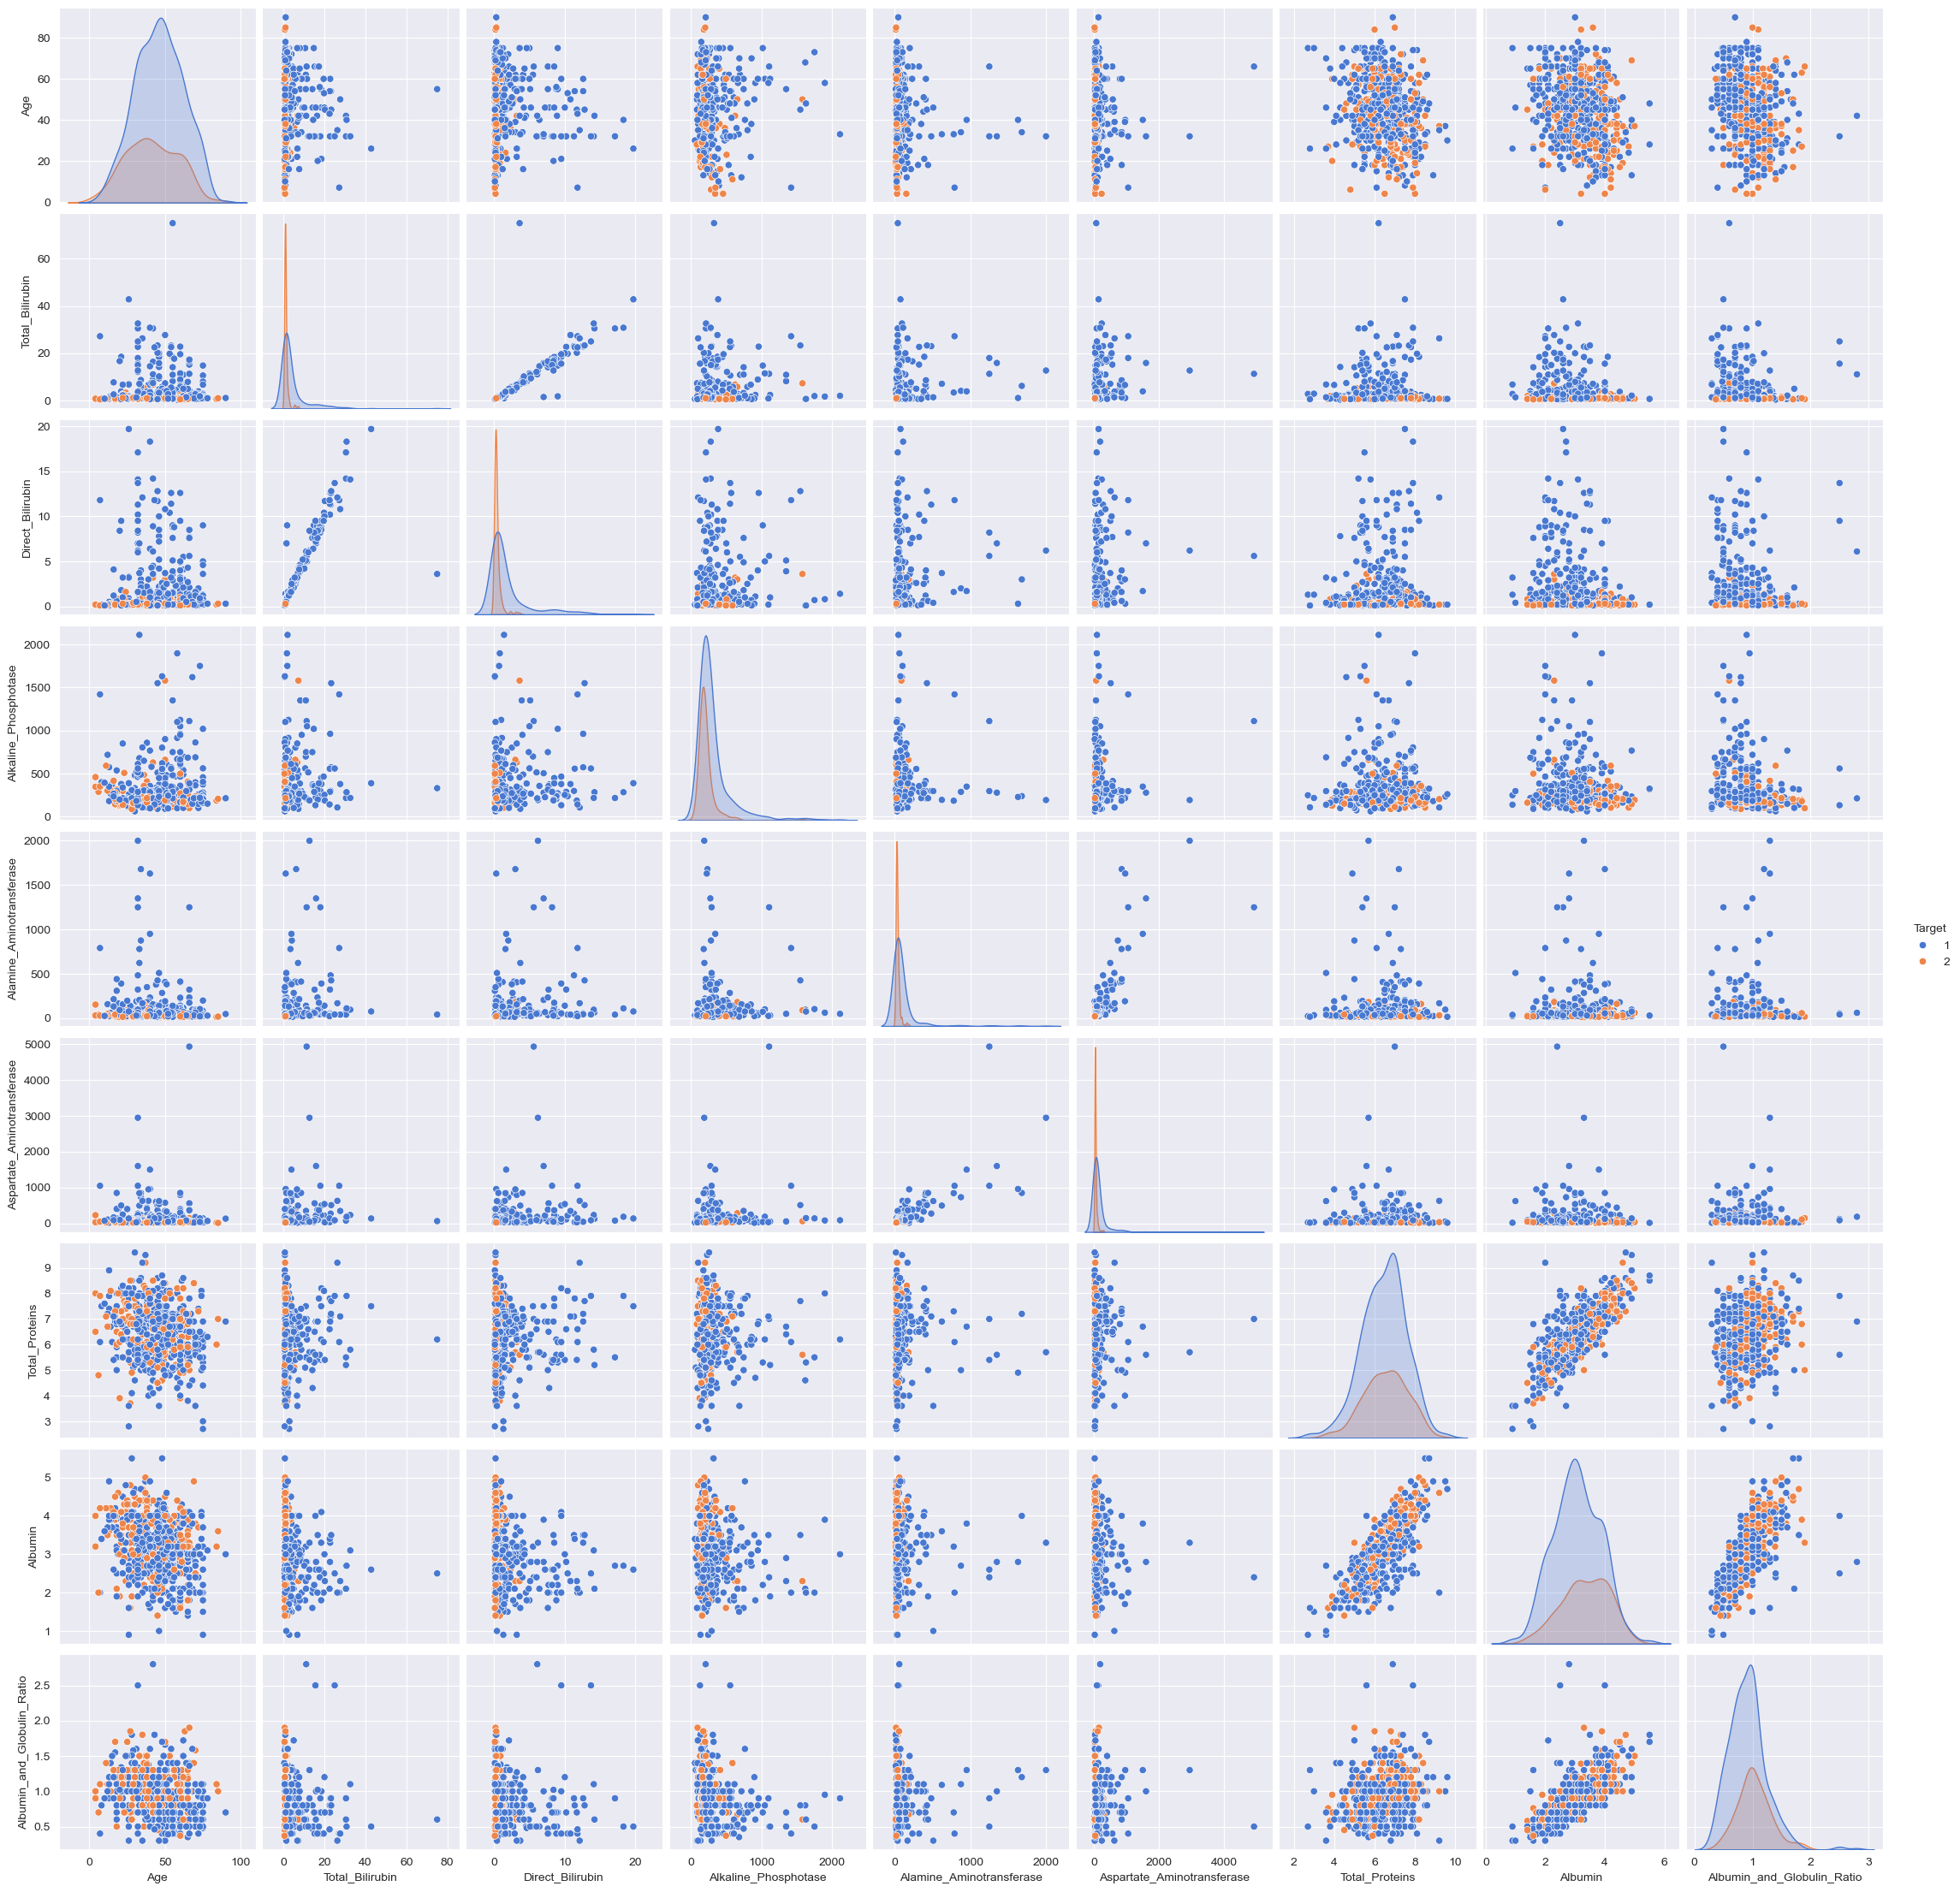

In [81]:
# Plotting a pairplot for the numerical columns
sns.pairplot(data, hue='Target',palette='muted')
plt.show()

# Feature Engineering

Feature engineering is the process of selecting, modifying, or creating new features from raw data to enhance the performance of machine learning models. In the context of liver disease analysis, feature engineering involves transforming and creating features that are more informative for classifying liver patients and non-patients. Common techniques include:

- **Handling Missing Values**: Imputing or removing missing data to ensure a complete and usable dataset.
- **Scaling and Normalization**: Adjusting features to a standard scale to prevent any variable from dominating during model training.
- **Encoding Categorical Variables**: Converting categorical variables (e.g., "Gender") into numerical values using techniques such as one-hot encoding or label encoding.
- **Feature Selection**: Identifying the most relevant features through correlation analysis or model-based importance measures.
- **Creating Interaction Features**: Combining existing features to capture complex relationships between them.
- **Dimensionality Reduction**: Reducing the number of features through techniques like PCA (Principal Component Analysis) to focus on the most important information.

Effective feature engineering can significantly improve model performance and uncover hidden patterns, enabling better prediction of liver disease.
r disease.


## 1. Data Preprocessing

Data preprocessing is crucial for preparing data for machine learning models. Key steps include:

- **Data Cleaning**: Removing duplicates, handling missing values (via imputation or removal).
- **Data Transformation**: Encoding categorical variables and scaling numerical features (e.g., Min-Max, Z-score normalization).
- **Feature Engineering**: Creating or modifying features to improve model performance.
- **Outlier Detection**: Identifying and handling outliers to prevent their impact on the model.
- **Data Splitting**: Dividing data into training, validation, and test sets (e.g., 70/15/15 split).

Proper preprocessing ensures the data is clean, consistent, and ready for accurate modeling.


In [84]:
data.columns # shows column name

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Target'],
      dtype='object')

In [85]:
# Count unique values in the 'Gender' column
data.Gender.value_counts()

Gender
Male      441
Female    142
Name: count, dtype: int64

The data shows a higher number of males compared to females, with males making up a larger proportion of the dataset.

In [87]:
# Count unique values in the 'Target' column
data.Target.value_counts()

Target
1    416
2    167
Name: count, dtype: int64


- **Target 1 (Liver Disease)**: 416 individuals
- **Target 2 (No Liver Disease)**: 167 individuals

The dataset shows a higher number of liver disease patients (Target 1) compared to individuals without liver disease (Target 2).

### Data Cleaning

In [90]:
# Count the number of missing values in each column
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Target                        0
dtype: int64

- **Albumin_and_Globulin_Ratio** has 4 missing values.

In [92]:
# Filter and display rows where 'Albumin_and_Globulin_Ratio' is missing (null)
missing_values = data[data['Albumin_and_Globulin_Ratio'].isnull()]
missing_values

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Target  
209      3.9                         NaN       1  
241      3.1                         NaN       1  
253      2.7                         NaN       2  
312      4.8                         NaN       2

In [93]:
# Replacing missing values in 'Albumin_and_Globulin_Ratio' with the mean of the column
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [94]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Target                        0
dtype: int64



- All columns now have 0 missing values.

The missing values in Albumin and Globulin Ratio have been successfully replaced with the mean, ensuring no missing data in the dataset.


### Outlier Detection 

- In this step we are going to create boxplots for each column to check for outliers using control statements(for loop,if)

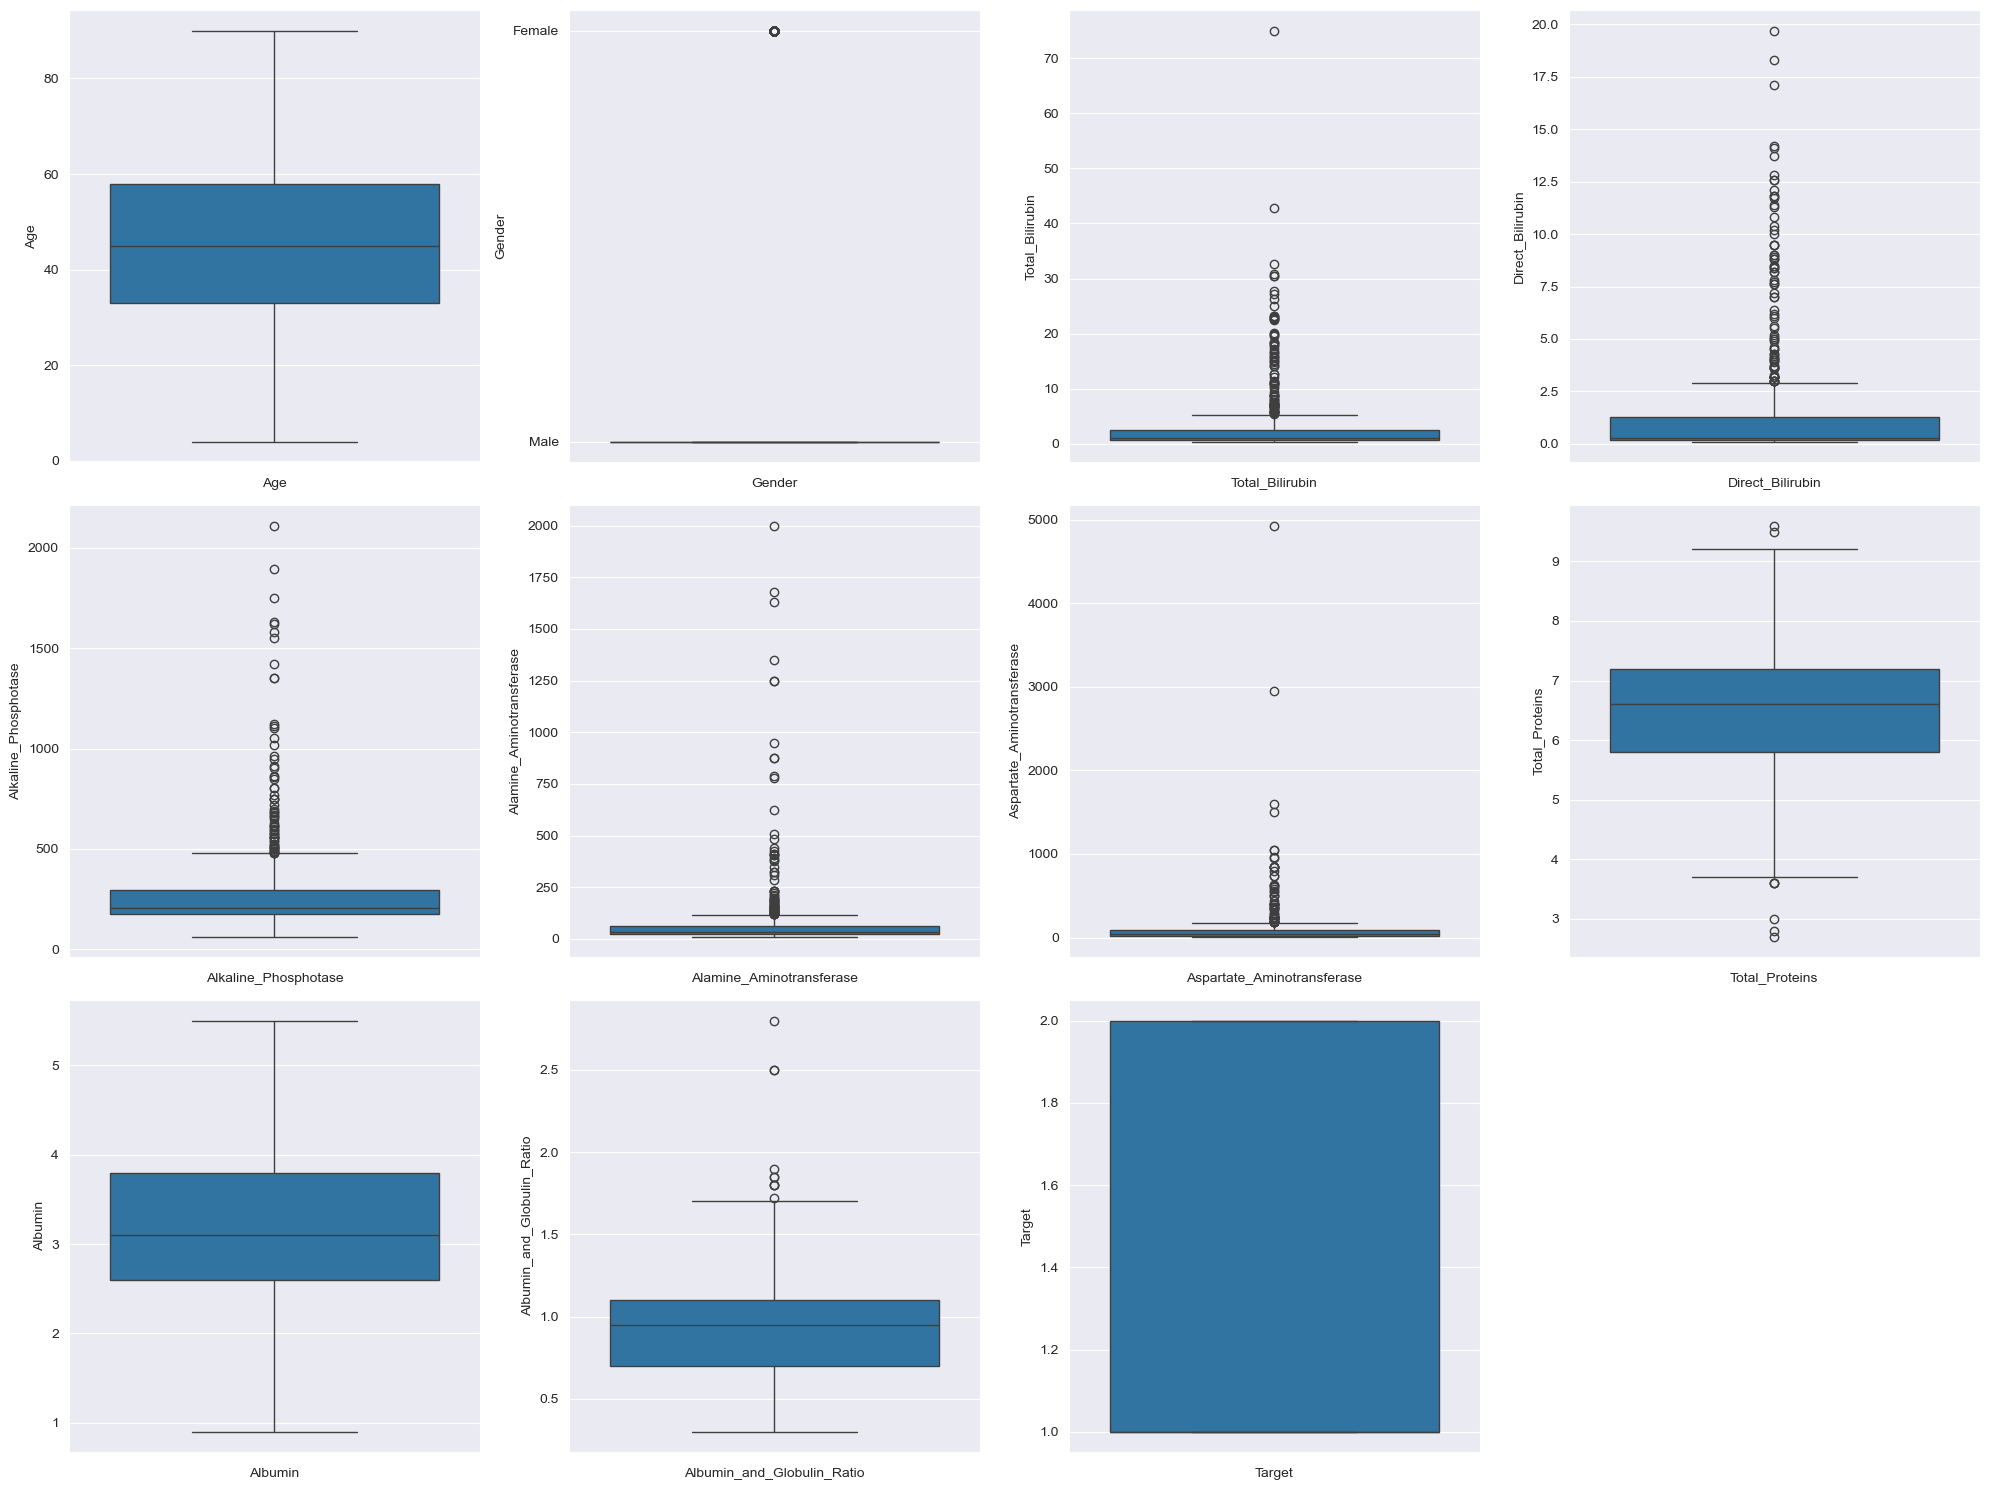

In [98]:
plt.figure(figsize=(20,15))  # Set figure size for better visibility
plt_num = 1  # Initialize subplot number
for column in data:
    if plt_num <= 11:  # Limit to first 11 columns for plotting
        plt.subplot(3,4,plt_num)  
        sns.boxplot(data[column])  # Boxplot to visualize outliers
        plt.xlabel(column, fontsize=10)  
    plt_num += 1  # Increment the subplot number for the next column
plt.tight_layout()  # Adjust layout for better spacing between subplots


### Insights for Columns with and without Outliers

#### **Columns with Outliers**  
1. **Total Bilirubin, ALT, AST, Direct Bilirubin, Alkaline Phosphatase**: High outliers indicate potential liver or related conditions.  
2. **Total Proteins**: Low outliers suggest possible health deficiencies.  
3. **Albumin_and_Globulin_Ratio**: Few abnormal ratios observed.

#### **Columns Without Outliers**  
- **Age, Albumin**: Consistent distributions without extreme values, reliable for analysis.

### Outlier Removal using IQR (Interquartile Range)

- This code performs outlier removal and visualization to clean and analyze the dataset:
1. Outlier Removal (IQR): Removes extreme values from numerical columns using the IQR method.
2. The IQR method is robust and effective for identifying outliers in numerical data.
3. Visualization through boxplots complements statistical methods, providing a clear understanding of data distribution post-cleaning.


Shape before removing outliers: (583, 11)
Shape after removing outliers: (233, 11)


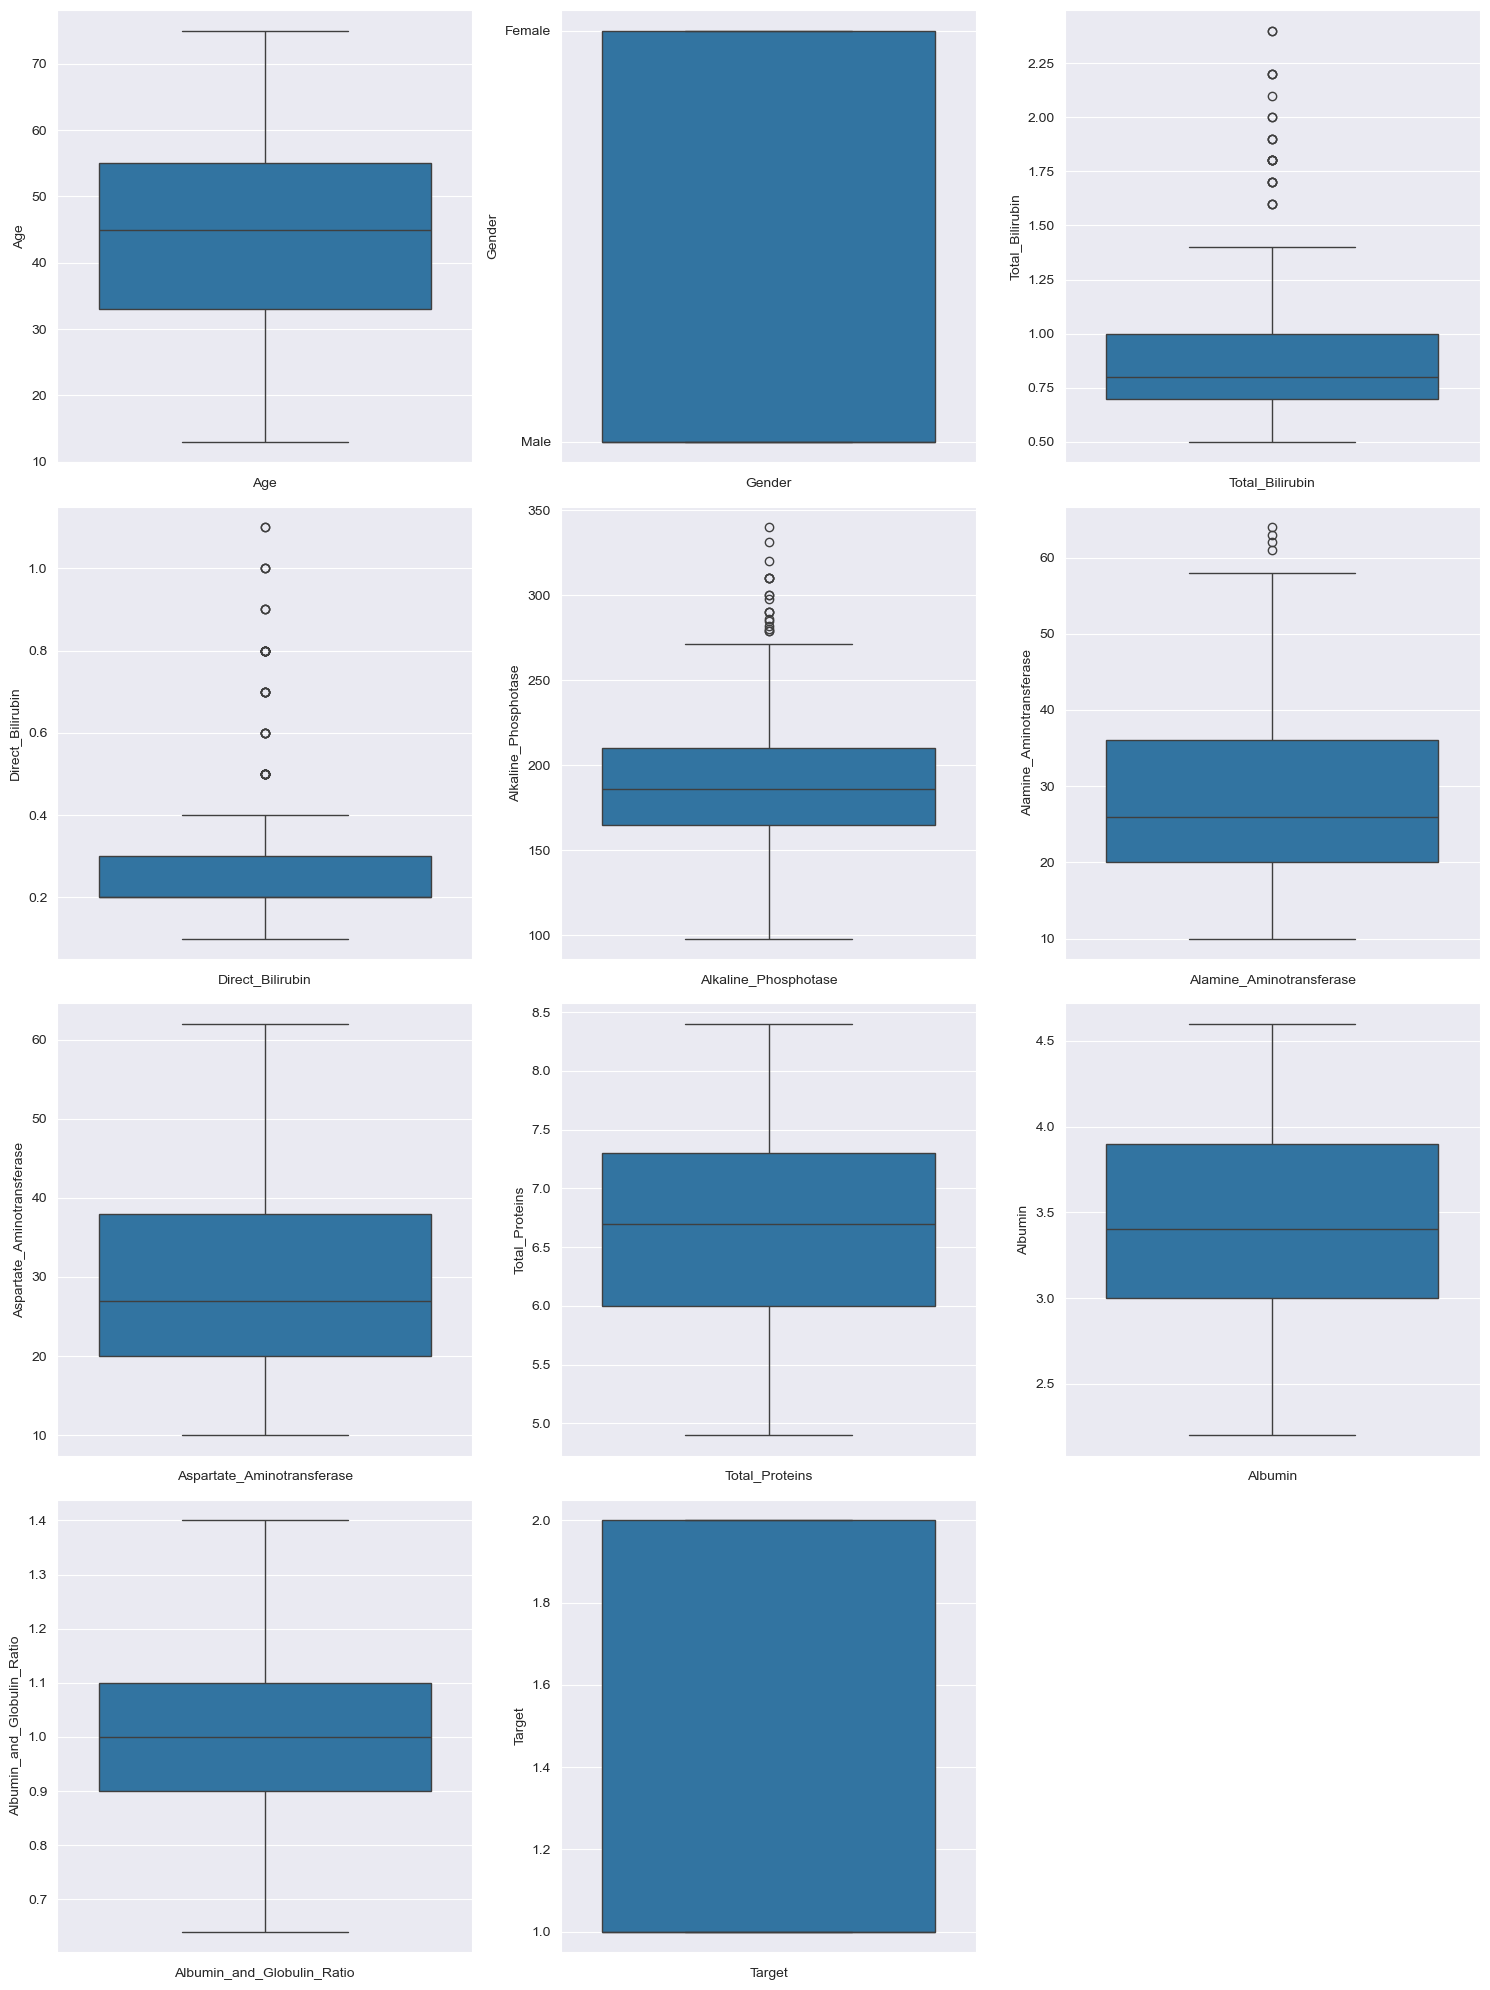

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers using IQR
def remove_outliers_iqr(data):
    # Before removing outliers - print the shape of the data
    print(f"Shape before removing outliers: {data.shape}")
    
    for column in data.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds
        lower_bound = Q1 - 0.9 * IQR
        upper_bound = Q3 + 0.9 * IQR
        
        # Remove rows where values are outside the IQR bounds
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # After removing outliers - print the shape of the data
    print(f"Shape after removing outliers: {data.shape}")
    
    return data

# Apply the function to remove outliers
cleaned_data = remove_outliers_iqr(data)

# Create boxplots for each column to check for outliers after removal
plt.figure(figsize=(15, 20))  # Set figure size for better visibility
plt_num = 1  # Initialize subplot number

# Loop through each column in the cleaned data
for column in cleaned_data:
    if plt_num <= 11:  # Limit to first 11 columns for plotting
        plt.subplot(4, 3, plt_num)  
        sns.boxplot(data=cleaned_data[column])  # Boxplot to visualize outliers
        plt.xlabel(column, fontsize=10)  
    plt_num += 1  # Increment the subplot number for the next column

plt.tight_layout()  # Adjust layout for better spacing between subplots
plt.show()

In [103]:
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Target  
0      3.3                        0.90       1  
1      3.2                        0.74       1  
2      3.3                        0.89       1  
3      3.4                        1.00       1  
4      2.4                        0.40       1

## 2. Feature Selection
>  Feature selection is the process of identifying and selecting the most relevant features for building machine learning models. The goal is to improve model performance by reducing overfitting, improving accuracy, and decreasing training time.


### HeatMap

> **Definition:**  
>  A heatmap uses color gradients to visualize the magnitude of values in a matrix format, especially useful for viewing correlations.

**Insights:**  
- **Correlation:** Shows strength and direction of relationships between features from -1 (strong negative correlation) to +1 (strong positive correlation).  
- **Color Coding:** Color scale indicates the intensity of correlations (darker shades for stronger correlations).  
- **Strong Relationships:** High correlations suggest closely related features, useful for feature selection.  
- **Multicollinearity:** Strong correlations between independent variables may indicate multicollinearity, affecting model performance.


In [107]:
# full correlation table
# Select only numeric columns for the heatmap
numerical_data = data.select_dtypes(include=['float64', 'int64'])
numerical_data.corr().style.background_gradient(cmap='Blues')

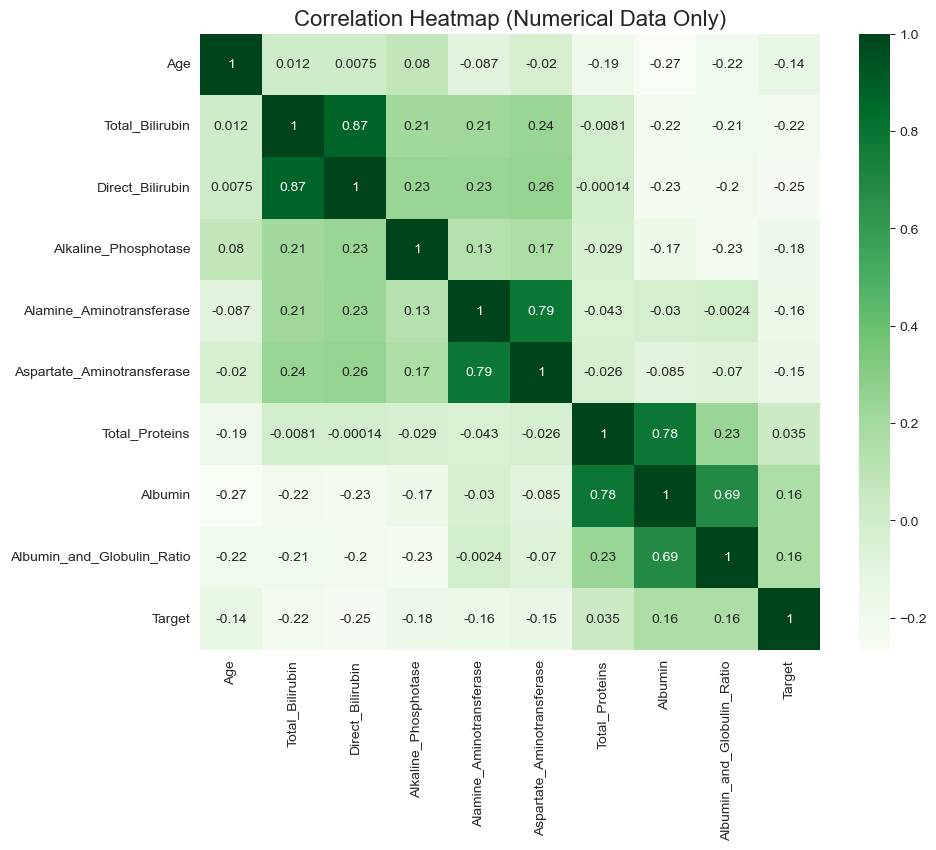

In [108]:
# Generate correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='Greens')
plt.title('Correlation Heatmap (Numerical Data Only)', fontsize=16)
plt.show()


**Observations:**

- **Strong Positive Correlation:**
  - **Total Bilirubin and Direct Bilirubin**: Strong correlation (0.87), as Direct Bilirubin is a component of Total Bilirubin.
  - **Total Proteins and Albumin**: Strong correlation (0.78), as albumin is a major protein in the blood.
  - **Aspartate Aminotransferase and Alamine Aminotransferase**: Strong correlation (0.79), both liver enzymes that indicate liver damage when elevated.

- **Moderate Positive Correlation:**
  - **Total Bilirubin and Alkaline Phosphotase**: Moderate correlation (0.21).
  - **Aspartate Aminotransferase and Total Proteins**: Moderate correlation (0.26).

- **Weak Negative Correlation:**
  - **Age and Alamine Aminotransferase**: Weak negative correlation (-0.087), suggesting that older individuals may have slightly lower levels of this enzyme.

- **No Strong Correlation:**
  - **Age and Target**: No strong correlation, indicating that age may not be a reliable indicator of liver disease.


In [110]:
# Creating a new feature 'Bilirubin_Ratio' by dividing Direct_Bilirubin by Total_Bilirubin
data['Bilirubin_Ratio'] = data['Direct_Bilirubin'] / data['Total_Bilirubin']

# Dropping the original columns 'Direct_Bilirubin' and 'Total_Bilirubin' due to high correlation
data.drop(['Direct_Bilirubin', 'Total_Bilirubin'], axis=1, inplace=True)

# Checking the number of rows and columns after creating the new feature and dropping the old ones
print(data.shape)  # This should display the updated shape of the data (rows, columns)


(583, 10)


- **Bilirubin Ratio**: Created by dividing **Direct_Bilirubin** by **Total_Bilirubin**, combining two features into one.
- **Feature Removal**: Dropped **Direct_Bilirubin** and **Total_Bilirubin** to simplify the dataset and reduce redundancy.
- **Data Shape**: The number of columns decreased by 2, but the number of rows remains the same.

In [112]:
data.head()

Age  Gender  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0   65  Female                   187                        16   
1   62    Male                   699                        64   
2   62    Male                   490                        60   
3   58    Male                   182                        14   
4   72    Male                   195                        27   

   Aspartate_Aminotransferase  Total_Proteins  Albumin  \
0                          18             6.8      3.3   
1                         100             7.5      3.2   
2                          68             7.0      3.3   
3                          20             6.8      3.4   
4                          59             7.3      2.4   

   Albumin_and_Globulin_Ratio  Target  Bilirubin_Ratio  
0                        0.90       1         0.142857  
1                        0.74       1         0.504587  
2                        0.89       1         0.561644  
3                        1.00       1         0.400000  
4                        0.40       1         0.512821

### Encoding
* Encoding Categorical Variables:
Convert categorical variables to numerical format using one-hot encoding or label encoding.

In [114]:
print(data['Gender'].unique())

['Female' 'Male']


In [115]:
# One-hot encoding the 'Gender' column to convert categorical values into binary format
gender = pd.get_dummies(data['Gender'], dtype="int")

# Displaying the resulting DataFrame
gender

Female  Male
0         1     0
1         0     1
2         0     1
3         0     1
4         0     1
..      ...   ...
578       0     1
579       0     1
580       0     1
581       0     1
582       0     1

[583 rows x 2 columns]

In [116]:
# Concatenating the one-hot encoded gender columns with the original data
data1 = pd.concat([gender, data], axis=1)

# Displaying the resulting DataFrame
data1


Female  Male  Age  Gender  Alkaline_Phosphotase  \
0         1     0   65  Female                   187   
1         0     1   62    Male                   699   
2         0     1   62    Male                   490   
3         0     1   58    Male                   182   
4         0     1   72    Male                   195   
..      ...   ...  ...     ...                   ...   
578       0     1   60    Male                   500   
579       0     1   40    Male                    98   
580       0     1   52    Male                   245   
581       0     1   31    Male                   184   
582       0     1   38    Male                   216   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Proteins  \
0                          16                          18             6.8   
1                          64                         100             7.5   
2                          60                          68             7.0   
3                          14                          20             6.8   
4                          27                          59             7.3   
..                        ...                         ...             ...   
578                        20                          34             5.9   
579                        35                          31             6.0   
580                        48                          49             6.4   
581                        29                          32             6.8   
582                        21                          24             7.3   

     Albumin  Albumin_and_Globulin_Ratio  Target  Bilirubin_Ratio  
0        3.3                        0.90       1         0.142857  
1        3.2                        0.74       1         0.504587  
2        3.3                        0.89       1         0.561644  
3        3.4                        1.00       1         0.400000  
4        2.4                        0.40       1         0.512821  
..       ...                         ...     ...              ...  
578      1.6                        0.37       2         0.200000  
579      3.2                        1.10       1         0.166667  
580      3.2                        1.00       1         0.250000  
581      3.4                        1.00       1         0.384615  
582      4.4                        1.50       2         0.300000  

[583 rows x 12 columns]

In [117]:
# Dropping the original 'Gender' column as it is now represented by the one-hot encoded columns
data1.drop("Gender", axis=1, inplace=True)

In [118]:
data1

Female  Male  Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0         1     0   65                   187                        16   
1         0     1   62                   699                        64   
2         0     1   62                   490                        60   
3         0     1   58                   182                        14   
4         0     1   72                   195                        27   
..      ...   ...  ...                   ...                       ...   
578       0     1   60                   500                        20   
579       0     1   40                    98                        35   
580       0     1   52                   245                        48   
581       0     1   31                   184                        29   
582       0     1   38                   216                        21   

     Aspartate_Aminotransferase  Total_Proteins  Albumin  \
0                            18             6.8      3.3   
1                           100             7.5      3.2   
2                            68             7.0      3.3   
3                            20             6.8      3.4   
4                            59             7.3      2.4   
..                          ...             ...      ...   
578                          34             5.9      1.6   
579                          31             6.0      3.2   
580                          49             6.4      3.2   
581                          32             6.8      3.4   
582                          24             7.3      4.4   

     Albumin_and_Globulin_Ratio  Target  Bilirubin_Ratio  
0                          0.90       1         0.142857  
1                          0.74       1         0.504587  
2                          0.89       1         0.561644  
3                          1.00       1         0.400000  
4                          0.40       1         0.512821  
..                          ...     ...              ...  
578                        0.37       2         0.200000  
579                        1.10       1         0.166667  
580                        1.00       1         0.250000  
581                        1.00       1         0.384615  
582                        1.50       2         0.300000  

[583 rows x 11 columns]

### Normalization/Scaling

Normalization or scaling adjusts numeric features to a similar range or distribution, improving model performance.

1. **Min-Max Scaling**: Scales data to a fixed range (e.g., [0, 1]).    

2. **Standardization**: Centers data around 0 with a standard deviation of 1.

#### Why Scaling is Important:
> - For Algorithms Sensitive to Magnitude: Algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Gradient Descent-based models are sensitive to the range of feature values. Scaling ensures that no feature dominates because of its magnitude.
> - Improves Convergence: For gradient-based algorithms, scaling speeds up convergence by making the optimization landscape smoother.
   

In [120]:
data1.columns

Index(['Female', 'Male', 'Age', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Aspartate_Aminotransferase',
       'Total_Proteins', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Target',
       'Bilirubin_Ratio'],
      dtype='object')

#### Here we are applying **Min-Max Scaling**

In [122]:
from sklearn.preprocessing import MinMaxScaler

# Define columns to be scaled (excluding 'Female', 'Male', 'Target')
columns_to_scale = ['Age', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
                    'Aspartate_Aminotransferase', 'Total_Proteins', 'Albumin', 
                    'Albumin_and_Globulin_Ratio', 'Bilirubin_Ratio']

# Apply MinMax scaling only to the selected columns
scaler = MinMaxScaler()
data1[columns_to_scale] = scaler.fit_transform(data1[columns_to_scale])

# Check the scaled data
data1.head()

Female  Male       Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0       1     0  0.709302              0.060576                  0.003015   
1       0     1  0.674419              0.310699                  0.027136   
2       0     1  0.674419              0.208598                  0.025126   
3       0     1  0.627907              0.058134                  0.002010   
4       0     1  0.790698              0.064485                  0.008543   

   Aspartate_Aminotransferase  Total_Proteins   Albumin  \
0                    0.001626        0.594203  0.521739   
1                    0.018296        0.695652  0.500000   
2                    0.011791        0.623188  0.521739   
3                    0.002033        0.594203  0.543478   
4                    0.009961        0.666667  0.326087   

   Albumin_and_Globulin_Ratio  Target  Bilirubin_Ratio  
0                       0.240       1         0.019155  
1                       0.176       1         0.092203  
2                       0.236       1         0.103725  
3                       0.280       1         0.071082  
4                       0.040       1         0.093865

# Model Selection
>  **Definition:**
>- Model selection is the process of choosing the most appropriate machine learning model for a given dataset, based on performance metrics and problem type.

### 1. Splitting the Data into Features and Target

- **Definition**: Separating the input variables (features) and the output variable (target) for model training.
- **Featurex (X)**: Independent variables used to make predictions (e.g., 'Age', 'Albumin').
- **Target (y)**: Dependent variable being predicted (e.g., 'Target' for liver disease).
- **Impact**: Ensures the model learns from the features to predict the target variable effectively.


In [125]:
# Split the data into features (x) and target (y)
x = data1.drop(columns=['Target'])  # Features
y = data1['Target']  # Target variable

# Check the shapes of x and y
print(x.shape)  # Features shape
print(y.shape)  # Target shape


(583, 10)
(583,)


In [126]:
x #independent variable

Female  Male       Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0         1     0  0.709302              0.060576                  0.003015   
1         0     1  0.674419              0.310699                  0.027136   
2         0     1  0.674419              0.208598                  0.025126   
3         0     1  0.627907              0.058134                  0.002010   
4         0     1  0.790698              0.064485                  0.008543   
..      ...   ...       ...                   ...                       ...   
578       0     1  0.651163              0.213483                  0.005025   
579       0     1  0.418605              0.017098                  0.012563   
580       0     1  0.558140              0.088911                  0.019095   
581       0     1  0.313953              0.059111                  0.009548   
582       0     1  0.395349              0.074744                  0.005528   

     Aspartate_Aminotransferase  Total_Proteins   Albumin  \
0                      0.001626        0.594203  0.521739   
1                      0.018296        0.695652  0.500000   
2                      0.011791        0.623188  0.521739   
3                      0.002033        0.594203  0.543478   
4                      0.009961        0.666667  0.326087   
..                          ...             ...       ...   
578                    0.004879        0.463768  0.152174   
579                    0.004269        0.478261  0.500000   
580                    0.007928        0.536232  0.500000   
581                    0.004472        0.594203  0.543478   
582                    0.002846        0.666667  0.760870   

     Albumin_and_Globulin_Ratio  Bilirubin_Ratio  
0                         0.240         0.019155  
1                         0.176         0.092203  
2                         0.236         0.103725  
3                         0.280         0.071082  
4                         0.040         0.093865  
..                          ...              ...  
578                       0.028         0.030695  
579                       0.320         0.023963  
580                       0.280         0.040792  
581                       0.280         0.067976  
582                       0.480         0.050889  

[583 rows x 10 columns]

In [127]:
y #dependent variable

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Target, Length: 583, dtype: int64

### 2. Train-Test Split:  
The train-test split divides data into two sets:  
- **Training Set**: Used to train the model (70-80% of the data).  
- **Testing Set**: Used to evaluate the model's performance (20-30% of the data).  

This helps prevent overfitting and allows evaluation of how well the model generalizes to unseen data. The common split ratio is 70/30 or 80/20.


In [129]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

# Verify split shapes
print(x_train.shape)  # Training features
print(x_test.shape)   # Testing features


(466, 10)
(117, 10)


In [130]:
x_train #Independent variables for training data

Female  Male       Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
473       0     1  0.441860              0.044455                  0.014070   
142       0     1  0.302326              0.131412                  0.037186   
497       0     1  0.732558              0.065950                  0.016080   
332       0     1  0.255814              0.095261                  0.035176   
319       0     1  0.116279              0.120664                  0.005528   
..      ...   ...       ...                   ...                       ...   
419       1     0  0.593023              0.628725                  0.021106   
120       0     1  0.325581              0.115779                  0.237186   
368       1     0  0.441860              0.058134                  0.006030   
48        1     0  0.325581              0.055203                  0.014573   
207       0     1  0.418605              0.140205                  0.472362   

     Aspartate_Aminotransferase  Total_Proteins   Albumin  \
473                    0.002236        0.594203  0.652174   
142                    0.026225        0.420290  0.391304   
497                    0.005896        0.652174  0.456522   
332                    0.020939        0.507246  0.434783   
319                    0.001220        0.782609  0.717391   
..                          ...             ...       ...   
419                    0.011181        0.579710  0.434783   
120                    0.053873        0.637681  0.565217   
368                    0.002033        0.652174  0.652174   
48                     0.003659        0.478261  0.456522   
207                    0.302907        0.579710  0.630435   

     Albumin_and_Globulin_Ratio  Bilirubin_Ratio  
473                        0.40         0.050889  
142                        0.24         0.040792  
497                        0.16         0.091276  
332                        0.20         0.084166  
319                        0.28         0.057620  
..                          ...              ...  
419                        0.16         0.086351  
120                        0.24         0.089520  
368                        0.32         0.040792  
48                         0.28         0.023963  
207                        0.40         0.078331  

[466 rows x 10 columns]

In [131]:
y_train # dependent variables for training data

473    2
142    1
497    1
332    1
319    2
      ..
419    1
120    1
368    1
48     1
207    1
Name: Target, Length: 466, dtype: int64

#### Standard Scaler
- Here, we are scaling the features of our dataset using the StandardScaler from the sklearn.preprocessing module.
- The training and testing datasets must be on the same scale for the model to make accurate predictions during testing or on unseen data.
- If the testing data is not scaled using the same parameters as the training data, it introduces discrepancies, leading to incorrect model evaluation.

In [133]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler to normalize the feature values
scaler = StandardScaler()

# Scale the training data using fit_transform
# This computes the mean and standard deviation from the training set and applies scaling
x_train_scaled = scaler.fit_transform(x_train)

# Scale the testing data using transform
# This uses the mean and standard deviation computed from the training data to scale the test set
x_test_scaled = scaler.transform(x_test)

# Best Practices:
# - Use fit_transform only on the training data to compute scaling parameters (mean, std).
# - Use transform on the testing data to prevent data leakage.
# - Scaling ensures features are on the same scale, improving model performance for distance-based or gradient-based algorithms.

### SMOTE: Synthetic Minority Oversampling Technique  

**Definition**:  
SMOTE is an oversampling method used to address imbalanced datasets, where one class significantly outnumbers the other(s). It works by creating synthetic samples of the minority class rather than simply duplicating existing ones. This helps to balance the dataset and improve model performance, especially for the minority class.  


In [135]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Initialize SMOTE to handle class imbalance
sm = SMOTE()

# Apply SMOTE to the scaled training data
# It generates synthetic samples for the minority class to balance the dataset
x_train_scaled_smote, y_train_smote = sm.fit_resample(x_train_scaled, y_train)

# Use Counter to count the occurrences of each class
print("Before applying SMOTE:", Counter(y_train))  # Shows the class distribution in the original dataset
print("After applying SMOTE:", Counter(y_train_smote))  # Shows the class distribution after balancing


Before applying SMOTE: Counter({1: 322, 2: 144})
After applying SMOTE: Counter({2: 322, 1: 322})


### Model Creation  

**Definition**:  
Model creation involves selecting a suitable machine learning algorithm, training it on the prepared data, and fine-tuning its parameters to achieve the best possible performance.  

**Steps in Model Creation**:  
1. **Select an Algorithm**: Choose an appropriate model (e.g., Logistic Regression, Decision Tree, Random Forest) based on the data and problem type (classification or regression).  
2. **Train the Model**: Use the training dataset to teach the model patterns in the data.  
3. **Evaluate the Model**: Test the model on the testing dataset to measure its accuracy, precision, recall, F1 score, or other metrics.  
4. **Optimize the Model**: Use techniques like hyperparameter tuning or cross-validation to enhance performance.  
5. **Save and Deploy**: Save the trained model for future predictions and deploy it in a real-world application.  


## Logistic Regression
> **Definition**:  
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is typically binary (e.g., 0 or 1, yes or no). It uses the logistic function to model the probability of a certain class or event. 

In [138]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a fixed random state for reproducibility
lr = LogisticRegression(random_state=1)

# Train the Logistic Regression model using the scaled and resampled training data
lr.fit(x_train_scaled_smote, y_train_smote)

LogisticRegression(random_state=1)

In [139]:
# Make predictions on the test set
y_pred = lr.predict(x_test_scaled) 

In [140]:
y_pred # Predicted values for the testing data

array([1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1], dtype=int64)

In [141]:
y_test # Actual value of testing data

4      1
335    1
244    1
39     1
543    1
      ..
311    1
412    1
421    2
529    1
536    1
Name: Target, Length: 117, dtype: int64

In [142]:
# Import Classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score,roc_auc_score

In [143]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[53, 41],
       [ 6, 17]], dtype=int64)

In [144]:
a1=accuracy_score(y_test, y_pred) # To evaluate model performance of testing data
a1

0.5982905982905983

In [145]:
# Calculating the precision score, which measures the proportion of true positive predictions
p1 = precision_score(y_test, y_pred)
p1

0.8983050847457628

In [146]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r1= recall_score(y_test, y_pred)
r1

0.5638297872340425

In [147]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f1 = f1_score(y_test, y_pred)
f1

0.6928104575163399

In [148]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           1       0.90      0.56      0.69        94
           2       0.29      0.74      0.42        23

    accuracy                           0.60       117
   macro avg       0.60      0.65      0.56       117
weighted avg       0.78      0.60      0.64       117



In [149]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra1= roc_auc_score(y_test, y_pred)
ra1

0.6514801110083256

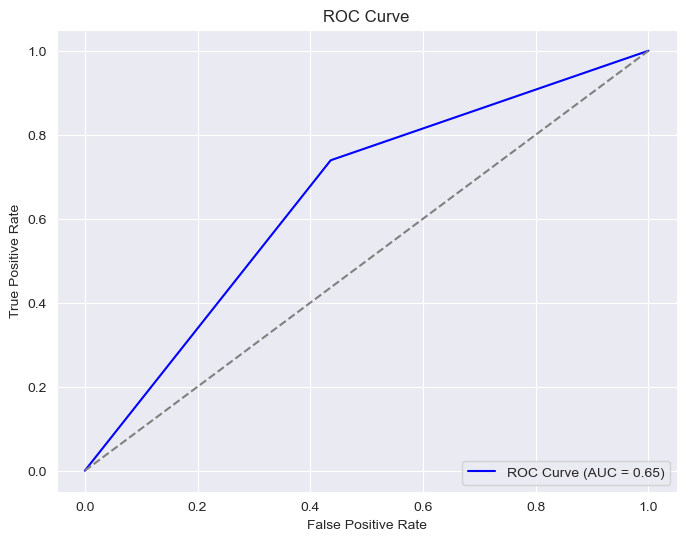

In [150]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for y_test (true labels) and y_pred (predicted labels)
# Specify pos_label=2 to indicate that class '2' is the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)

# Calculate the AUC (Area Under the Curve) score for the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve with AUC in the label
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (representing random classifier, AUC = 0.5)
plt.title('ROC Curve')  # Title of the plot
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Display the legend in the lower right corner
plt.grid(True)  # Display grid lines on the plot
plt.show()  # Show the plot


## K-Nearest Neighbors (KNN)
>  **Definition:**
> - K-Nearest Neighbors (KNN) is a machine learning algorithm that makes predictions based on the "k" closest data points to a given test point. It is used for both classification and regression tasks.

In [152]:
from sklearn.neighbors import KNeighborsClassifier  # Importing the KNN classifier from sklearn

# Initialize the KNN model with k=2 (you can adjust k based on your needs)
knn = KNeighborsClassifier(n_neighbors=2)

# Step 1: Train the KNN model using the scaled training data (with SMOTE applied)
knn.fit(x_train_scaled_smote, y_train_smote)  # Training the KNN model on the scaled training data with SMOTE

# Step 2: Make predictions on the test set
y_pred_knn = knn.predict(x_test_scaled)  # Predicting the target variable using the scaled test data


In [153]:
# Predict on the scaled test data
y_pred_knn = knn.predict(x_test_scaled)

In [154]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[78, 16],
       [14,  9]], dtype=int64)

In [155]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a2=accuracy_score(y_test, y_pred_knn)
a2

0.7435897435897436

In [156]:
# Calculating the precision score, which measures the proportion of true positive predictions
p2 = precision_score(y_test, y_pred_knn)
p2

0.8478260869565217

In [157]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r2= recall_score(y_test, y_pred_knn)
r2

0.8297872340425532

In [158]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f2 = f1_score(y_test, y_pred_knn)
f2

0.8387096774193549

In [159]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr = classification_report(y_test, y_pred_knn)
print(cr)

              precision    recall  f1-score   support

           1       0.85      0.83      0.84        94
           2       0.36      0.39      0.38        23

    accuracy                           0.74       117
   macro avg       0.60      0.61      0.61       117
weighted avg       0.75      0.74      0.75       117



In [160]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra2 = roc_auc_score(y_test, y_pred_knn)
ra2

0.61054579093432

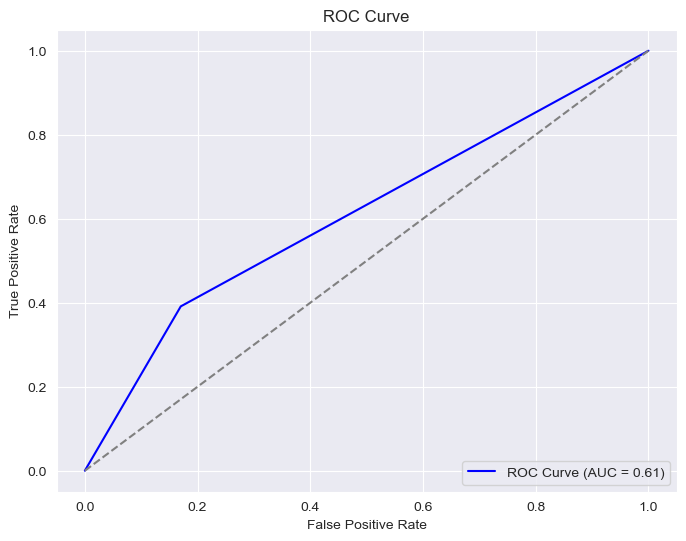

In [161]:
from sklearn.metrics import roc_curve, auc  # Import ROC and AUC functions
import matplotlib.pyplot as plt  # Import plotting library

# Compute ROC curve for y_test and predictions
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label=2)  

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('ROC Curve')  # Plot title
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc='lower right')  # Legend position
plt.grid(True)  # Show grid
plt.show()  # Display plot


## Support Vector Machine (SVM)
> **Definition:**
> - Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the feature space.

In [163]:
from sklearn.svm import SVC

# Initialize the SVM model with class weights
svm_model = SVC(class_weight='balanced', random_state=1)

# Fit the model
svm_model.fit(x_train_scaled_smote, y_train_smote)

SVC(class_weight='balanced', random_state=1)

In [164]:
# Predict on the scaled test data
y_pred_svm = svm_model.predict(x_test_scaled)

In [165]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred_svm)
cm

array([[50, 44],
       [ 8, 15]], dtype=int64)

In [166]:
# Calculating the accuracy of the model by comparing predicted values to actual values
accuracy_score(y_test, y_pred_svm) 

0.5555555555555556

In [167]:
# Calculating the precision score, which measures the proportion of true positive predictions
p3 = precision_score(y_test, y_pred_svm)
p3

0.8620689655172413

In [168]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r3= recall_score(y_test, y_pred_svm)
r3

0.5319148936170213

In [169]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f3 = f1_score(y_test, y_pred_svm)
f3

0.6578947368421053

In [170]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr=classification_report(y_test,y_pred_svm)
print(cr)

              precision    recall  f1-score   support

           1       0.86      0.53      0.66        94
           2       0.25      0.65      0.37        23

    accuracy                           0.56       117
   macro avg       0.56      0.59      0.51       117
weighted avg       0.74      0.56      0.60       117



In [171]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
roc_auc_score(y_test, y_pred_svm)

0.5920444033302498

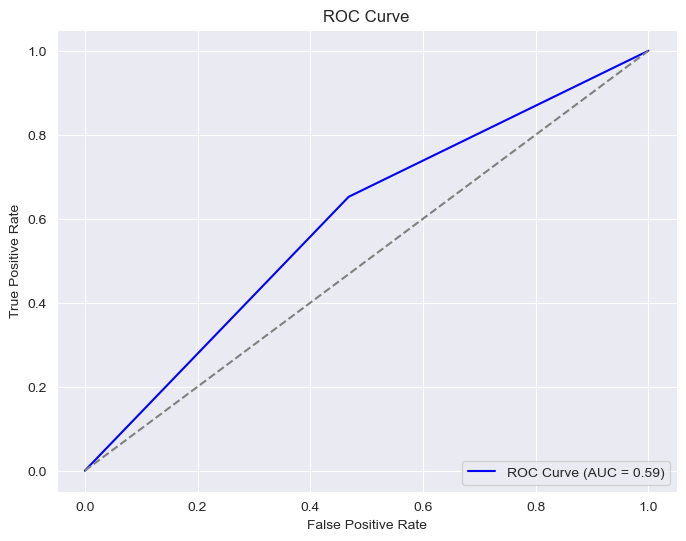

In [172]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for y_test and predicted probabilities
# `fpr` = False Positive Rate, `tpr` = True Positive Rate, `thresholds` = Threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm, pos_label=2)  # Specify pos_label=2

# Calculate the AUC score (Area Under the ROC Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')  # Title of the plot
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Display legend in the lower right corner
plt.grid(True)  # Show grid
plt.show()  # Display the plot


### Hyperparameter Tuning in SVM

Hyperparameter tuning in SVM aims to find the best settings for key parameters:

1. **C**: Controls regularization; higher values make the model more complex.
2. **Kernel**: Defines the transformation of data (Linear, RBF, Polynomial).
3. **Gamma**: Influences the shape of the decision boundary.
4. **Degree**: (for Polynomial kernel) Defines the degree of the polynomial.
5. **Coef0**: (for Polynomial/Sigmoid kernels) Controls the influence of higher-degree terms.

Tuning is done using **Grid Search** or **Randomized Search** with **Cross-validation**.


In [174]:
# Import the required libraries
from sklearn.svm import SVC  # Support Vector Machine (SVM) classifier
from sklearn.model_selection import GridSearchCV  # For performing Grid Search
from sklearn.model_selection import StratifiedKFold  # For Stratified KFold Cross-Validation

# Define the SVM model
svm = SVC()

# Define a reduced parameter grid for faster grid search
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization parameter (C) values
    'kernel': ['linear', 'rbf'],  # Kernel types (linear and Radial Basis Function)
    'gamma': ['scale', 'auto'],  # Kernel coefficient (gamma) values
    'class_weight': [None, 'balanced'],  # Class weighting options
    'probability': [True],  # Enable probability estimates for prediction
}

# Stratified KFold Cross-Validation: Ensures that each fold has the same class distribution
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)  # Reduced splits for faster execution

# Initialize the GridSearchCV with the SVM model
grid_search = GridSearchCV(
    estimator=svm,  # The SVM model to be tuned
    param_grid=param_grid,  # Parameter grid to be searched
    cv=stratified_kfold,  # Stratified KFold cross-validation for balanced class distribution
    scoring='accuracy',  # Use accuracy as the evaluation metric
    n_jobs=1,  # Limit to 1 core (set to -1 to use all available cores for parallelization)
    verbose=1,  # Set verbosity level to show progress
    return_train_score=True  # Return the training score for comparison
)

# Perform Grid Search on the selected features (train data with SMOTE)
grid_search.fit(x_train_scaled_smote, y_train_smote)


Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
             estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf'], 'probability': [True]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [175]:
# Get the best model
best_model = grid_search.best_estimator_    

In [176]:
# Make predictions on the test set using the best model
y_pred_svm1 = best_model.predict(x_test_scaled)

In [177]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a3 = accuracy_score(y_test, y_pred_svm1)
a3

0.6923076923076923

In [178]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra3= roc_auc_score(y_test, y_pred_svm1)
ra3

0.5786308973172988

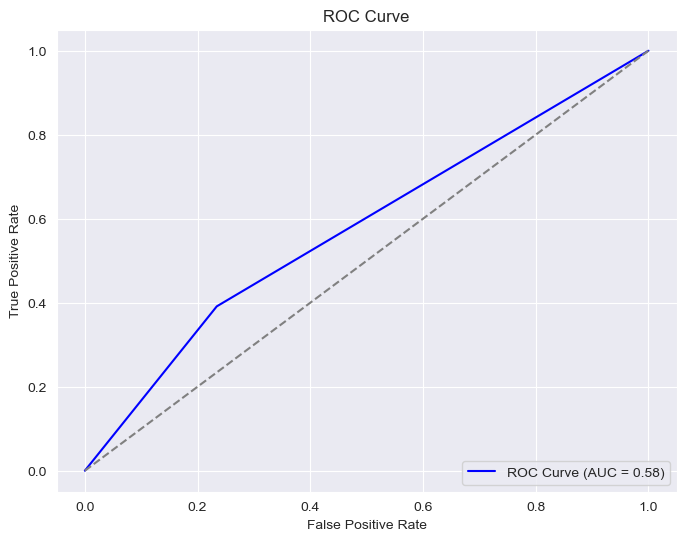

In [179]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm1, pos_label=2)  # ROC curve for class 2
roc_auc = auc(fpr, tpr)  # Calculate AUC score

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set plot size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.title('ROC Curve')  # Title
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc='lower right')  # Display legend
plt.grid(True)  # Show grid
plt.show()  # Display plot


## Random Forest

> Random Forest is an ensemble learning technique that combines multiple decision trees to improve classification accuracy and reduce overfitting. Each tree is trained on a random subset of the data, and their predictions are averaged for regression or voted for classification.


In [181]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=86)  # Add random_state for reproducibility

# Train the Random Forest model on the scaled training data
rf_model.fit(x_train_scaled_smote, y_train_smote)


RandomForestClassifier(random_state=86)

In [182]:
# Predict on the scaled test data
y_pred_rf = rf_model.predict(x_test_scaled)

In [183]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred_rf)
cm

array([[75, 19],
       [12, 11]], dtype=int64)

In [184]:
# Calculating the accuracy of the model by comparing predicted values to actual values
accuracy_score(y_test, y_pred_rf)

0.7350427350427351

In [185]:
# Calculating the precision score, which measures the proportion of true positive predictions
p4 = precision_score(y_test, y_pred_rf)
p4

0.8620689655172413

In [186]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r4= recall_score(y_test, y_pred_rf)
r4

0.7978723404255319

In [187]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f4 = f1_score(y_test, y_pred_rf)
f4

0.8287292817679558

In [188]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr=classification_report(y_test,y_pred_rf)
print(cr)

              precision    recall  f1-score   support

           1       0.86      0.80      0.83        94
           2       0.37      0.48      0.42        23

    accuracy                           0.74       117
   macro avg       0.61      0.64      0.62       117
weighted avg       0.76      0.74      0.75       117



In [189]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
roc_auc_score(y_test, y_pred_rf)


0.6380666049953747

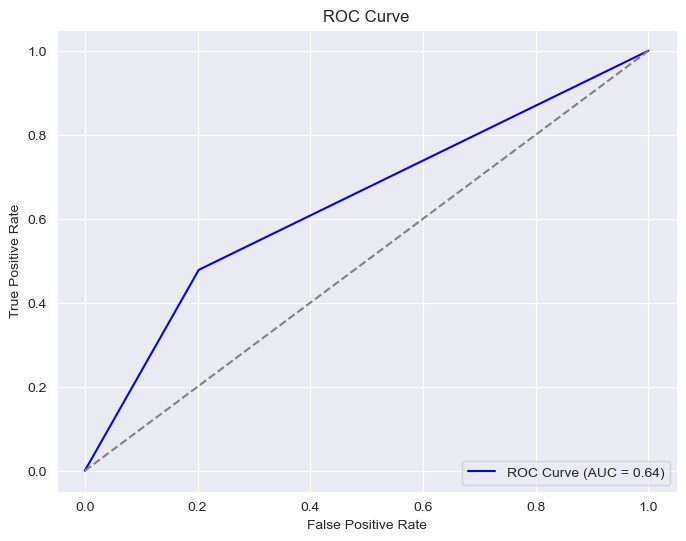

In [190]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for y_test and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=2)  # Compute ROC curve for the random forest model (pos_label=2)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)  # Calculate Area Under the Curve (AUC)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve with AUC label
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier (50% performance)
plt.title('ROC Curve')  # Set the plot title
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Show the legend in the lower right corner
plt.grid(True)  # Enable grid
plt.show()  # Display the plot


### Hyperparameter Tuning in Random Forest

Hyperparameter tuning in Random Forest helps optimize model performance. Key hyperparameters to tune include:

1. **n_estimators**: Number of trees in the forest. Higher values often improve performance.
2. **max_depth**: Maximum depth of each tree to control overfitting.
3. **min_samples_split**: Minimum samples required to split a node.
4. **min_samples_leaf**: Minimum samples required at a leaf node.
5. **max_features**: Number of features to consider when splitting a node.
6. **bootstrap**: Whether bootstrap samples are used when building trees.


In [192]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model with random_state for reproducibility
rf_model = RandomForestClassifier(random_state=1)

# Define the parameter distribution for Randomized Search with reduced options
param_dist = {
    'n_estimators': randint(100, 500),  # Reduce the range for the number of trees
    'max_depth': randint(5, 20),  # Limit tree depth to prevent overfitting
    'min_samples_split': randint(2, 10),  # Adjust range of internal node splits
    'min_samples_leaf': randint(1, 5),  # Adjust range for leaf nodes
    'max_features': ['sqrt'],  # Keep only 'sqrt' for simplicity
    'bootstrap': [True],  # Only use bootstrap sampling
    'class_weight': ['balanced'],  # Handle class imbalance
}

# Initialize RandomizedSearchCV with reduced n_iter and cv
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=50,  # Reduce the number of iterations for faster fitting
    cv=5,  # Reduce cross-validation folds for faster training
    scoring='accuracy',
    n_jobs=1,  # Use all available CPU cores for parallelization
    verbose=1,  # Show progress for better monitoring
    random_state=54
)

# Fit the model using RandomizedSearchCV
random_search_rf.fit(x_train_scaled_smote, y_train_smote)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=1,
                   param_distributions={'bootstrap': [True],
                                        'class_weight': ['balanced'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6EF750560>,
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6EFBC3740>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6EFBC07A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C6EFB8E690>},
                   random_state=54, scoring='accuracy', verbose=1)

In [193]:
# Get the best model 
best_model_rf = random_search_rf.best_estimator_# Get the best parameters and model

In [194]:
# Predict on the scaled test data
y_pred_rf1 = best_model_rf.predict(x_test_scaled)

In [195]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a4=accuracy_score(y_test,y_pred_rf1)
a4

0.7008547008547008

In [196]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra4= roc_auc_score(y_test, y_pred_rf1)
ra4

0.6167900092506937

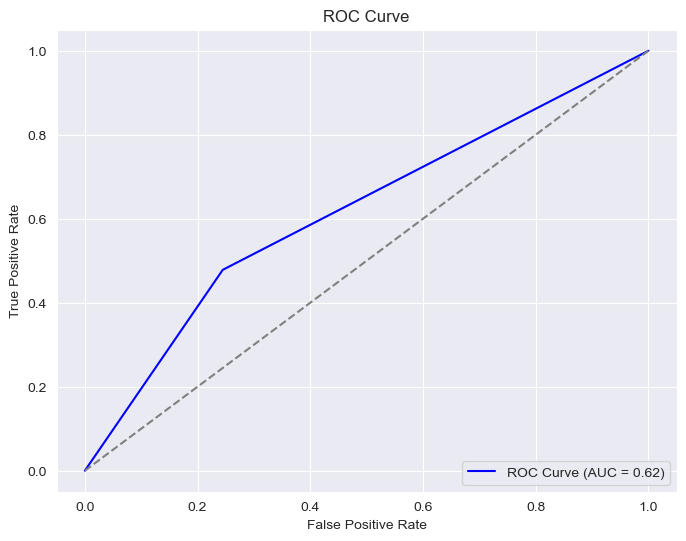

In [197]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for y_test and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf1, pos_label=2)  # Compute ROC curve for the random forest model (pos_label=2)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)  # Calculate Area Under the Curve (AUC)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve with AUC label
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier (50% performance)
plt.title('ROC Curve')  # Set the plot title
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Show the legend in the lower right corner
plt.grid(True)  # Enable grid
plt.show()  # Display the plot


## Decision Tree

A Decision Tree is a supervised machine learning algorithm that divides a dataset into subsets using a tree-like model of decisions. Each internal node of the tree represents a decision based on a feature, and each leaf node represents an outcome (class label or continuous value).

#### Key Features:
1. **Easy to Understand**: Decision trees are simple to visualize and interpret.
2. **Non-linear Model**: They can handle non-linear data patterns.
3. **Handles Both Numerical and Categorical Data**: Unlike some algorithms, decision trees can handle both types of data.


In [199]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=45)

# Train the Decision Tree model on the training data
dt_model.fit(x_train_scaled_smote, y_train_smote)


DecisionTreeClassifier(random_state=45)

In [200]:
#  Predict on the test data
y_pred_dt = dt_model.predict(x_test_scaled)

In [201]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[71, 23],
       [13, 10]], dtype=int64)

In [202]:
# Calculating the accuracy of the model by comparing predicted values to actual values
accuracy_score(y_test, y_pred_dt)

0.6923076923076923

In [203]:
# Calculating the precision score, which measures the proportion of true positive predictions
p5 = precision_score(y_test, y_pred_dt)
p5

0.8452380952380952

In [204]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r5= recall_score(y_test, y_pred_dt)
r5

0.7553191489361702

In [205]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f5 = f1_score(y_test, y_pred_dt)
f5

0.797752808988764

In [206]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr=classification_report(y_test,y_pred_dt)
print(cr)

              precision    recall  f1-score   support

           1       0.85      0.76      0.80        94
           2       0.30      0.43      0.36        23

    accuracy                           0.69       117
   macro avg       0.57      0.60      0.58       117
weighted avg       0.74      0.69      0.71       117



In [207]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
roc_auc_score(y_test, y_pred_dt)

0.5950508788159112

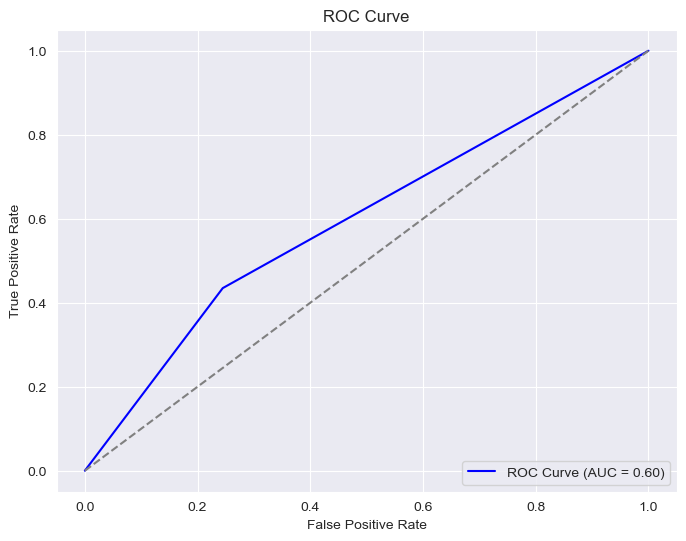

In [208]:
from sklearn.metrics import roc_curve, auc  # Import ROC curve and AUC calculation functions
import matplotlib.pyplot as plt  # Import plotting library

# Compute ROC curve for y_test and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, pos_label=2)  # Calculate false positive and true positive rates for ROC

# Calculate the AUC score
roc_auc = auc(fpr, tpr)  # Compute the area under the ROC curve

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set plot size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot ROC curve with AUC label
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Add diagonal line (random classifier)
plt.title('ROC Curve')  # Set plot title
plt.xlabel('False Positive Rate')  # Label for X-axis
plt.ylabel('True Positive Rate')  # Label for Y-axis
plt.legend(loc='lower right')  # Add legend
plt.grid(True)  # Display grid
plt.show()  # Show the plot


### Hyperparameter Tuning:
Tuning the parameters can significantly improve model performance. Techniques like GridSearchCV and RandomizedSearchCV are commonly used to find the best hyperparameters.

- Hyperparameters:
1. **max_depth**: Maximum depth of the tree. Controls overfitting.
2. **min_samples_split**: Minimum number of samples required to split an internal node.
3. **min_samples_leaf**: Minimum number of samples required at a leaf node.
4. **criterion**: The function to measure the quality of a split. Common choices are "gini" (Gini impurity) and "entropy" (information gain).
5. **max_features**: The number of features to consider when looking for the best split.
6. **splitter**: The strategy used to split at each node ("best" or "random").



In [210]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV  # Import cross-validation and GridSearchCV
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree classifier
from imblearn.pipeline import Pipeline as ImbPipeline  # Import pipeline from imbalanced-learn
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance
from sklearn.preprocessing import StandardScaler  # Import StandardScaler for feature scaling

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Create a pipeline with scaling, SMOTE, and the Decision Tree classifier
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),  # Step for scaling features
    ('smote', SMOTE()),            # Step for handling class imbalance
    ('dt', dt)                     # Step for the Decision Tree classifier
])

# Define the parameter grid for GridSearchCV to tune model parameters
param_grid = {
    'dt__criterion': ['gini', 'entropy'],  # Options for the criterion (gini or entropy)
    'dt__max_depth': [None, 5, 10],  # Limit depth options for the tree
    'dt__min_samples_split': [2, 5],  # Fewer options for split size
    'dt__min_samples_leaf': [1, 2],  # Fewer options for leaf size
}

# Initialize Stratified K-Fold with 14 splits for balanced class distribution
stratified_kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=114)

# Initialize GridSearchCV with StratifiedKFold for cross-validation and the defined parameter grid
grid_search = GridSearchCV(
    estimator=pipeline,  # Use the pipeline as the estimator
    param_grid=param_grid,  # Define parameter grid for tuning
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=stratified_kfold,  # Use Stratified K-Fold cross-validation
    n_jobs=1,  # Use all available CPU cores for parallelization
    verbose=1  # Show progress during the grid search
)

# Fit the GridSearchCV with the training data
grid_search.fit(x_train_scaled_smote, y_train_smote)  # Train the model with the resampled and scaled data

Fitting 20 folds for each of 24 candidates, totalling 480 fits


GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=114, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE()),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [None, 5, 10],
                         'dt__min_samples_leaf': [1, 2],
                         'dt__min_samples_split': [2, 5]},
             scoring='accuracy', verbose=1)

In [211]:
# Get the best model
best_model_dt = grid_search.best_estimator_

In [212]:
# Evaluate the model on the test set
y_pred_dt1 = best_model_dt.predict(x_test_scaled)

In [213]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a5= accuracy_score(y_test, y_pred_dt1)
a5

0.6923076923076923

In [214]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra5= roc_auc_score(y_test, y_pred_dt1)
ra5

0.5950508788159112

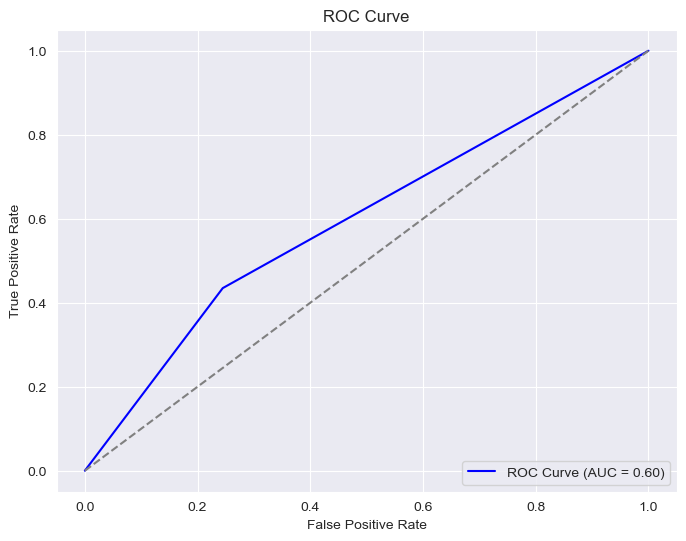

In [215]:
from sklearn.metrics import roc_curve, auc  # Import ROC and AUC functions
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Compute ROC curve for y_test (true labels) and y_pred_dt1 (predicted labels)
# pos_label=2 specifies that label 2 represents the positive class (e.g., liver disease)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt1, pos_label=2)

# Calculate the AUC score from the ROC curve
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set the figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier (AUC = 0.5)
plt.title('ROC Curve')  # Set the title of the plot
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Display the AUC score in the lower-right corner
plt.grid(True)  # Enable the grid on the plot
plt.show()  # Display the plot


## Gradient Boosting

Gradient Boosting is an ensemble learning method that builds models sequentially, with each new model correcting the errors of the previous one. It's powerful for both classification and regression tasks.

#### Key Points:
- **Boosting**: Sequentially improves models by focusing on errors made by previous models.
- **Weak Learners**: Typically shallow decision trees.
- **High Accuracy**: Often performs well in predictive tasks.

In [217]:
from sklearn.ensemble import GradientBoostingClassifier  # Import model

# Initialize and train the Gradient Boosting model with a fixed random_state
gb_model = GradientBoostingClassifier(random_state=37)
# Train on scaled and SMOTE data
gb_model.fit(x_train_scaled_smote, y_train_smote)  

GradientBoostingClassifier(random_state=37)

In [218]:
# Predict on the scaled test data
y_pred_gb = gb_model.predict(x_test_scaled)

# Predict on the scaled training data (optional, for training accuracy)
y_train_pred_gb = gb_model.predict(x_train_scaled_smote)

In [219]:
# Generating the confusion matrix to evaluate the model's predictions
cm= confusion_matrix(y_test,y_pred_gb)
cm

array([[70, 24],
       [12, 11]], dtype=int64)

In [220]:
# Calculating the accuracy of the model by comparing predicted values to actual values
accuracy_score(y_test,y_pred_gb)

0.6923076923076923

In [221]:
# Calculating the precision score, which measures the proportion of true positive predictions
p6=precision_score(y_test,y_pred_gb)
p6

0.8536585365853658

In [222]:
# Calculating the recall score, which measures the proportion of actual positives correctly identified by the model
r6=recall_score(y_test,y_pred_gb)
r6

0.7446808510638298

In [223]:
# Calculating the F1 score, which is the harmonic mean of precision and recall
f6=f1_score(y_test,y_pred_gb)
f6

0.7954545454545454

In [224]:
# Generating and printing the classification report, which includes precision, recall, f1-score, and support
cr=classification_report(y_test,y_pred_gb)
print(cr)

              precision    recall  f1-score   support

           1       0.85      0.74      0.80        94
           2       0.31      0.48      0.38        23

    accuracy                           0.69       117
   macro avg       0.58      0.61      0.59       117
weighted avg       0.75      0.69      0.71       117



In [225]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
roc_auc_score(y_test, y_pred_gb)

0.6114708603145237

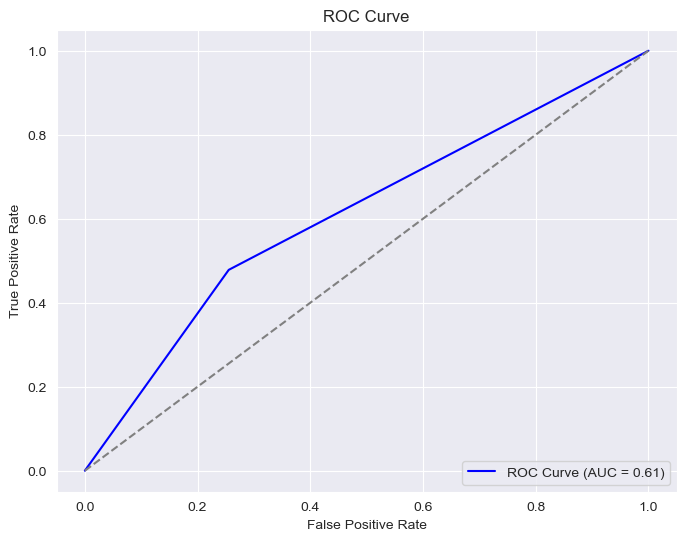

In [226]:
from sklearn.metrics import roc_curve, auc  # Import required metrics
import matplotlib.pyplot as plt  # Import plotting library

# Compute ROC curve for y_test and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb, pos_label=2)  # Specify pos_label=2

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')  # Title of the plot
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.legend(loc='lower right')  # Add legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


### Hyperparameters in Gradient Boosting

Gradient Boosting models require careful hyperparameter tuning to optimize performance. Key hyperparameters include:

1. **n_estimators**: Number of boosting stages (trees). Too many may overfit.
2. **learning_rate**: Controls the contribution of each tree. Lower rates require more trees.
3. **max_depth**: Maximum depth of trees. Deeper trees capture more complexity but risk overfitting.
4. **min_samples_split**: Minimum samples to split a node. Larger values reduce overfitting.
5. **min_samples_leaf**: Minimum samples required at leaf nodes. Controls tree complexity.
6. **subsample**: Fraction of samples used for each tree. Helps reduce overfitting.
7. **max_features**: Number of features to consider for splits. Can be 'sqrt', 'log2', or integer.


In [228]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Define a reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Fewer options for boosting stages
    'learning_rate': [0.1, 0.2],  # Fewer learning rates
    'max_depth': [3, 4],  # Limit depth to 3 or 4
    'min_samples_split': [2, 5],  # Fewer options for split size
    'min_samples_leaf': [1, 2],  # Smaller range for leaf size
    'subsample': [0.8],  # Fix subsample to 0.8
    'max_features': ['sqrt', None]  # Focus on sqrt and no feature limit
}

# Initialize GridSearchCV
grid_search_gb = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=5,  # Use 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1,  # Utilize all available CPU cores
    verbose=1
)

# Fit the model using Grid Search
grid_search_gb.fit(x_train_scaled_smote, y_train_smote)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [3, 4],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5], 'n_estimators': [50, 100],
                         'subsample': [0.8]},
             scoring='accuracy', verbose=1)

In [229]:
best_gb_model = grid_search_gb.best_estimator_  # Get the best model from GridSearchCV

# Evaluate the best model on the test data
y_test_pred_gb1 = best_gb_model.predict(x_test_scaled)  # Predict on test data


In [230]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a6=accuracy_score(y_test,y_test_pred_gb1)
a6

0.717948717948718

In [231]:
# Calculating the ROC-AUC score, which provides insight into the model's ability to distinguish between the classes
ra6= roc_auc_score(y_test, y_test_pred_gb1)
ra6

0.5945883441258094

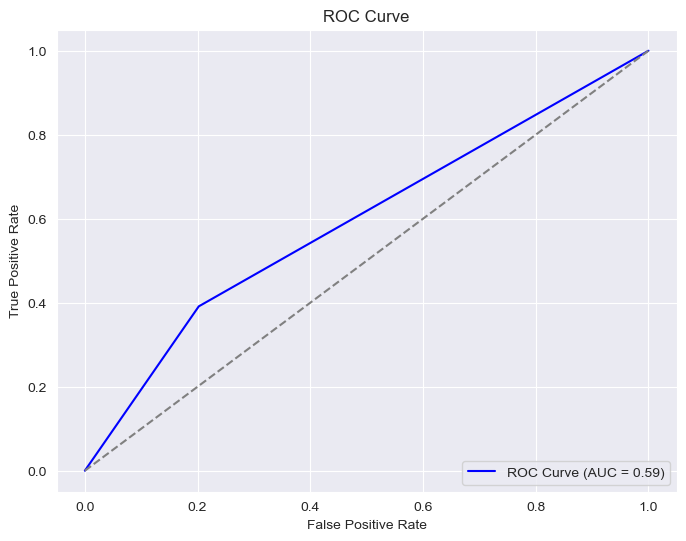

In [232]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve for y_test and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_gb1, pos_label=2)  # Specify pos_label=2 for class 2

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.title('ROC Curve')  # Title of the plot
plt.xlabel('False Positive Rate')  # X-axis label
plt.ylabel('True Positive Rate')  # Y-axis label
plt.legend(loc='lower right')  # Position of the legend
plt.grid(True)  # Enable grid
plt.show()  # Show the plot


## XGBoost (Extreme Gradient Boosting)

XGBoost is an optimized implementation of the gradient boosting algorithm designed to be highly efficient, flexible, and portable. It is widely used for supervised learning tasks like classification and regression.


In [234]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=1)

# Transform training labels: Replace class '1' with '0' and class '2' with '1'
y_train_transformed = y_train_smote.replace({1: 0, 2: 1})  # Transform labels for binary classification

# Train the base model using transformed training labels
xgb_model.fit(x_train_scaled_smote, y_train_transformed)  # Fit the model


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [235]:
# Predict on the test set using the trained XGBoost model
y_test_pred_transformed = xgb_model.predict(x_test_scaled)

In [236]:
# Compute confusion matrix for transformed test labels and predictions
cm = confusion_matrix(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed)

In [237]:
# Calculating the accuracy of the model by comparing predicted values to actual values
accuracy_score(y_test.replace({1:0,2:1}), y_test_pred_transformed)

0.7435897435897436

In [238]:
# Calculate precision score with 'weighted' average to handle class imbalance
p7 = precision_score(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed, average='weighted')
print(p7)


0.7435897435897436


In [239]:
# Calculate recall score with 'weighted' average to handle class imbalance
r7 = recall_score(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed, average='weighted')
print(r7)


0.7435897435897436


In [240]:
# Calculate F1 score with 'weighted' average to handle class imbalance
f7 = f1_score(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed, average='weighted')
print(f7)


0.7435897435897436


In [241]:
# Calculate the ROC AUC score with 'weighted' average to handle class imbalance
ra = roc_auc_score(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed, average='weighted')
print(ra)


0.5941258094357077


In [242]:
# Generate and print the classification report to evaluate performance
cr = classification_report(y_test.replace({1: 0, 2: 1}), y_test_pred_transformed)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        94
           1       0.35      0.35      0.35        23

    accuracy                           0.74       117
   macro avg       0.59      0.59      0.59       117
weighted avg       0.74      0.74      0.74       117



### Hyperparameters in XGBoost

XGBoost is a powerful model that can be tuned to achieve optimal performance. Key hyperparameters include:

1. **n_estimators**: Number of boosting rounds (trees).
2. **learning_rate**: Shrinks contribution of each tree.
3. **max_depth**: Maximum depth of trees.
4. **min_child_weight**: Minimum sum of instance weight in a child.
5. **subsample**: Fraction of samples used for each tree.
6. **colsample_bytree**: Fraction of features for each tree.
7. **gamma**: Minimum loss required for partitioning.
8. **scale_pos_weight**: Adjusts for imbalanced classes.

In [244]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from scipy.stats import randint

# Re-encode the training labels to 0 and 1 for binary classification
label_encoder = LabelEncoder()
y_train_transformed = label_encoder.fit_transform(y_train_smote)  # Re-encode to 0, 1

# Define the hyperparameters for XGBoost tuning
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize Stratified KFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=33)

# Initialize RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=33),
    param_distributions=param_dist,
    n_iter=50,  # Number of combinations to try
    scoring='accuracy',
    cv=cv,  # 10-fold cross-validation with stratified split
    verbose=1,
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    random_state=33
)

# Fit the model using RandomizedSearchCV on SMOTE-applied data
random_search_xgb.fit(x_train_scaled_smote, y_train_transformed)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=33, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importa...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=33, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.8, 1.0]},
                   random_state=33, scoring='accuracy', verbose=1)

In [245]:
# get the best model
best_model = random_search_xgb.best_estimator_

In [246]:
# Step 4: Evaluate the best model on the test and train
y_test_pred_xgb1 = best_model.predict(x_test_scaled)

In [247]:
# Calculating the accuracy of the model by comparing predicted values to actual values
a7=accuracy_score(y_test.replace({1:0,2:1}), y_test_pred_xgb1)
a7

0.7435897435897436

In [248]:
# Calculate the ROC AUC score with 'weighted' average to handle class imbalance
ra7= roc_auc_score(y_test.replace({1:0,2:1}), y_test_pred_xgb1, average='weighted')
ra7

0.5612858464384829

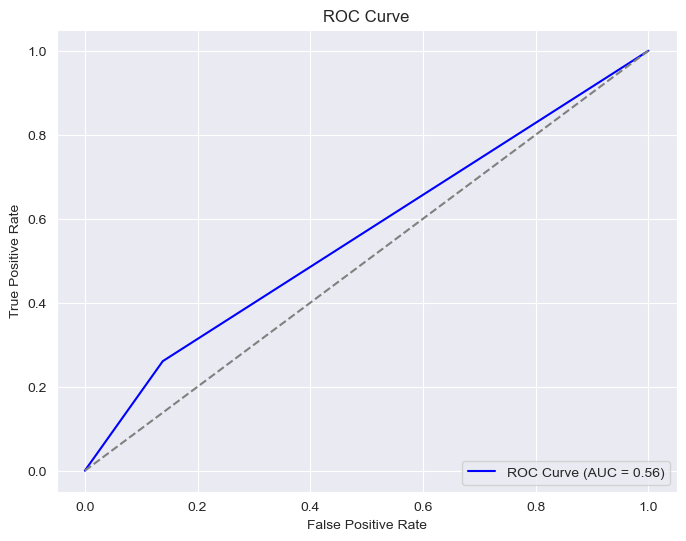

In [249]:
from sklearn.metrics import roc_curve, auc  # Import ROC and AUC functions
import matplotlib.pyplot as plt  # Import plotting library

# Compute ROC curve with the original y_test (no replacement needed)
fpr, tpr, thresholds = roc_curve(y_test.replace({1:0,2:1}), y_test_pred_xgb1, pos_label=1)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier diagonal line
plt.title('ROC Curve')  # Set title
plt.xlabel('False Positive Rate')  # Set X-axis label
plt.ylabel('True Positive Rate')  # Set Y-axis label
plt.legend(loc='lower right')  # Display legend
plt.grid(True)  # Show grid
plt.show()  # Display the plot


## Artificial Neural Networks (ANN)

An Artificial Neural Network (ANN) is a computational model inspired by the way biological neural networks in the human brain process information. It is widely used for tasks like classification, regression, pattern recognition, and deep learning.

#### Key Components:
- **Neurons**: Basic units that process inputs and produce outputs.
- **Layers**: Input, hidden, and output layers.
- **Activation Functions**: Introduce non-linearity (e.g., ReLU, Sigmoid).
- **Backpropagation**: Training method that adjusts weights based on errors


In [251]:
import numpy as np
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier from sklearn

# Ensure the target labels are properly transformed
y_train_transformed = y_train_smote.replace({1: 0, 2: 1})
y_test_transformed = y_test.replace({1: 0, 2: 1})

# Initialize and train the MLP model
ann_model = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=100, learning_rate_init=0.01, random_state=21, early_stopping=True, validation_fraction=0.1)

# Fit the model on the training data with SMOTE applied
ann_model.fit(x_train_scaled_smote, y_train_transformed)  # Training the model

MLPClassifier(early_stopping=True, hidden_layer_sizes=(100, 50),
              learning_rate_init=0.01, max_iter=100, random_state=21)

In [252]:
# Predict on the test and training data
y_pred_ann = ann_model.predict(x_test_scaled)

In [253]:
# Compute confusion matrix to evaluate the performance of the model
cm = confusion_matrix(y_test_transformed, y_pred_ann)
cm

array([[64, 30],
       [ 9, 14]], dtype=int64)

In [254]:
# Calculate the accuracy score to evaluate the performance of the model
a8= accuracy_score(y_test_transformed, y_pred_ann)
a8

0.6666666666666666

In [255]:
# Calculate precision score to evaluate how many predicted positives were actually positive
p8=precision_score(y_test_transformed, y_pred_ann)
p8

0.3181818181818182

In [256]:
# Calculate recall score to evaluate how many actual positives were correctly predicted
r8=recall_score(y_test_transformed, y_pred_ann)
r8 

0.6086956521739131

In [257]:
# Calculate F1 score, which is the harmonic mean of precision and recall
f8=f1_score(y_test_transformed, y_pred_ann)
f8

0.417910447761194

In [258]:
# Calculate ROC AUC score, which evaluates the performance of the classifier across all thresholds
ra8=roc_auc_score(y_test_transformed, y_pred_ann)
ra8

0.6447733580018502

In [259]:
# Generate a classification report which provides precision, recall, F1-score, and support for each class
cr=classification_report(y_test_transformed,y_pred_ann)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        94
           1       0.32      0.61      0.42        23

    accuracy                           0.67       117
   macro avg       0.60      0.64      0.59       117
weighted avg       0.77      0.67      0.70       117



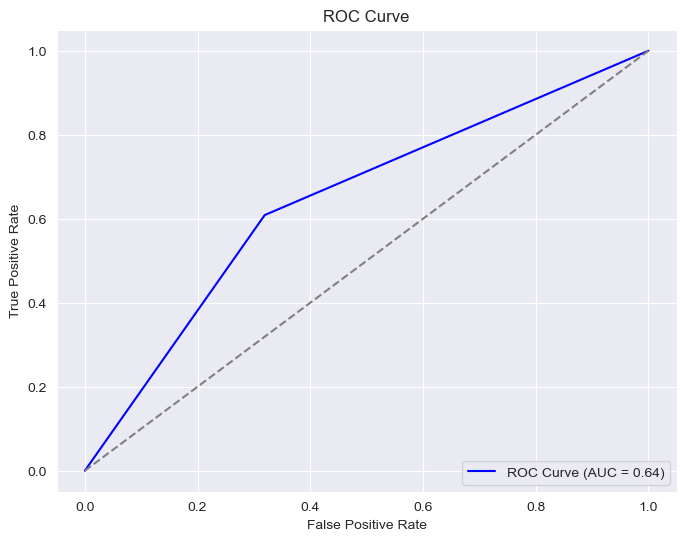

In [260]:
from sklearn.metrics import roc_curve, auc  # Import ROC and AUC functions
import matplotlib.pyplot as plt  # Import plotting library

# Compute ROC curve for y_test and predicted probabilities, specifying pos_label=1
fpr, tpr, thresholds = roc_curve(y_test_transformed, y_pred_ann, pos_label=1)  

# Calculate AUC score from the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))  # Set figure size for the plot
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot the ROC curve
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random classifier
plt.title('ROC Curve')  # Set the title for the plot
plt.xlabel('False Positive Rate')  # Label the x-axis
plt.ylabel('True Positive Rate')  # Label the y-axis
plt.legend(loc='lower right')  # Position the legend in the lower right
plt.grid(True)  # Enable grid lines for better visibility
plt.show()  # Display the plot


In [261]:
import pandas as pd

# Create a dataframe to store performance metrics for all models
score = pd.DataFrame({
    "Model": [  # List of model names
        "LogisticRegression", "KNN Algorithm", "SVM", "RandomForest", 
        "DecisionTree", "GradientBoosting", "XGBClassifier", "ANN_MLPClassifier"
    ],
    "Testing_Accuracy": [  # List of accuracy scores for each model (multiplied by 100 for percentage)
        a1 * 100, a2 * 100, a3 * 100, a4 * 100, a5 * 100, a6 * 100, a7 * 100, a8 * 100
    ],
    "F1_Score": [  # List of F1 scores for each model (multiplied by 100 for percentage)
        f1 * 100, f2 * 100, f3 * 100, f4 * 100, f5 * 100, f6 * 100, f7 * 100, f8 * 100
    ],
    "Recall_Score": [  # List of recall scores for each model (multiplied by 100 for percentage)
        r1 * 100, r2 * 100, r3 * 100, r4 * 100, r5 * 100, r6 * 100, r7 * 100, r8 * 100
    ],
    "Precision_Score": [  # List of precision scores for each model (multiplied by 100 for percentage)
        p1 * 100, p2 * 100, p3 * 100, p4 * 100, p5 * 100, p6 * 100, p7 * 100, p8 * 100
    ],
    "Roc_Auc_score": [  # List of ROC AUC scores for each model (multiplied by 100 for percentage)
        ra1 * 100, ra2 * 100, ra3 * 100, ra4 * 100, ra5 * 100, ra6 * 100, ra7 * 100, ra8 * 100
    ]
})

# Display the performance comparison table
score


Model  Testing_Accuracy   F1_Score  Recall_Score  \
0  LogisticRegression         59.829060  69.281046     56.382979   
1       KNN Algorithm         74.358974  83.870968     82.978723   
2                 SVM         69.230769  65.789474     53.191489   
3        RandomForest         70.085470  82.872928     79.787234   
4        DecisionTree         69.230769  79.775281     75.531915   
5    GradientBoosting         71.794872  79.545455     74.468085   
6       XGBClassifier         74.358974  74.358974     74.358974   
7   ANN_MLPClassifier         66.666667  41.791045     60.869565   

   Precision_Score  Roc_Auc_score  
0        89.830508      65.148011  
1        84.782609      61.054579  
2        86.206897      57.863090  
3        86.206897      61.679001  
4        84.523810      59.505088  
5        85.365854      59.458834  
6        74.358974      56.128585  
7        31.818182      64.477336

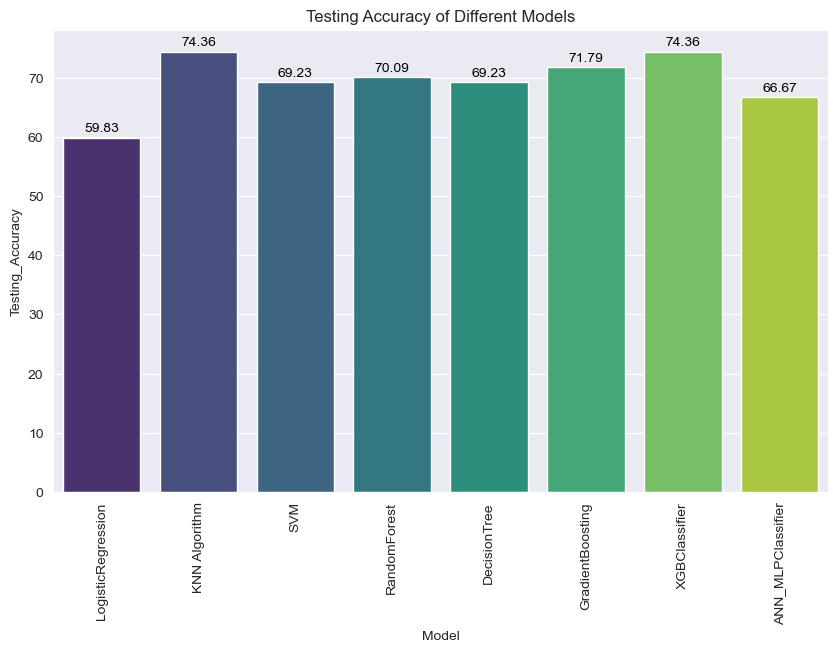

In [262]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size and rotate the x-axis labels
plt.figure(figsize=(10, 6))  # Set the figure size
plt.xticks(rotation=90)  # Rotate x-axis labels to make them readable

# Create a bar plot with 'Model' as hue to avoid the warning
a = sns.barplot(x="Model", y="Testing_Accuracy", data=score, hue="Model", palette="viridis", legend=False)

# Add values on top of the bars
for index, value in enumerate(score["Testing_Accuracy"]):
    a.text(index, value + 1, f'{value:.2f}', ha="center", color='black')  # Add accuracy text on top

# Display the plot
plt.title('Testing Accuracy of Different Models')  # Title of the plot
plt.show()  # Show the plot


## Model Performance:

- **Best Model**: KNN Algorithm (highest accuracy, F1, recall, and precision).
- **Second Best**: Random Forest (high F1, recall, and precision).
- **Worst Model**: ANN_MLPClassifier (lowest performance across all metrics).
derfitting.


## Final Report 



### Overview

This report presents the performance evaluation of several machine learning models on a classification task. The models tested include:

- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Machine (SVM)
- Random Forest
- Decision Tree
- Gradient Boosting
- XGBoost (XGB)
- Artificial Neural Network (ANN_MLPClassifier)

The evaluation is based on the following metrics: **Accuracy**, **F1 Score**, **Recall Score**, **Precision Score**, and **ROC AUC Score**.

### Best Performing Models

1. **KNN Algorithm**: 
   - **Highest** in Testing Accuracy, F1 Score, Recall Score, and Precision Score.
   - Outperforms other models in most metrics, especially in recall and precision.

2. **Random Forest**:
   - **Second Best** with high scores in F1, Recall, and Precision.
   - Performs well, particularly in handling the variance in the dataset.

### Worst Performing Model

- **ANN_MLPClassifier**:
   - Consistently shows the lowest performance across all metrics.
   - This indicates that the neural network model might be overfitting or underfitting.

### Observations

- **Tree-based Models** (Decision Tree, Random Forest, Gradient Boosting, XGB) generally perform well with high scores in F1, Recall, and Precision, suggesting their robustness in handling different data distributions.
  
- **KNN Algorithm** excels overall, outperforming most other models in most evaluation metrics. It is particularly strong in recall and precision, making it the top choice for this dataset.
  
- **SVM** performs well in Precision but struggles with Recall, indicating it may be more suited for tasks where false positives are critical to minimize.
  
- **Logistic Regression** shows a decent F1 score but has relatively poor Recall and AUC scores, making it less favorable for imbalanced classification problems.
  
- **ANN_MLPClassifier** performs poorly across all metrics. It suggests potential overfitting or underfitting, where tuning or model adjustments may be required for improvement.

### Hyperparameter Tuning

- Various models, including **Gradient Boosting** and **XGBoost**, underwent hyperparameter tuning using methods like **Grid Search** and **Randomized Search**.
  
- The tuning improved the performance of models like Random Forest and XGBoost by optimizing parameters such as the number of estimators, learning rate, max depth, and subsample rates.
  
### Conclusion

Based on the evaluation:

- **KNN Algorithm** is the best-performing model for this task, followed closely by **Random Forest**.
- **ANN_MLPClassifier** requires further tuning or modifications due to its poor performance.
  
Tree-based models remain the most robust choices for this dataset, with **KNN** offering the best balance of speed and accuracy across the evaluation metrics.


## Final Report on Challenges Faced in Liver Disease Prediction Model
>  The development of the liver disease prediction model presented several challenges at each stage of the process, ranging from data preprocessing to model deployment. Below is a consolidated report of the challenges encountered and the steps taken to address them.

### 1. Data Preprocessing Challenges

- **Missing Column Names**: Extracted column names from the README file as the dataset initially lacked column names, causing confusion during data inspection.
- **Missing Values**: Imputed missing values in the **albumin and globulin ratio** column using the mean to preserve data integrity.
- **Outliers**: Removed outliers by reducing the **Interquartile Range (IQR)**, though many extreme outliers remained, requiring further preprocessing.
- **Feature Selection**: Combined **direct bilirubin** and **total bilirubin** into a **bilirubin ratio** to reduce redundancy while retaining critical information.
- **One-Hot Encoding**: Applied **one-hot encoding** to the **gender** column for compatibility with machine learning models.
- **Feature Scaling**: Normalized features using **Min-Max scaling** and applied **Standard scaling** to training and testing datasets for consistent feature scaling.
- **Imbalanced Data**: Addressed class imbalance using **SMOTE** (Synthetic Minority Over-sampling Technique) to improve model performance.
### 2. **Model Selection and Tuning allenges**

- **Hyperparameter Tuning**: Hyperparameter tuning with **GridSearchCV** and **RandomizedSearchCV** was computationally expensive, especially for models like **XGBoost** and **Random Forest**, requiring evaluation of numerous parameter combinations.
- **Performance Issues with ANN**: The **ANN_MLPClassifier** exhibited overfitting and underfitting, resulting in poor performance despite tuning layers, neurons, and activation functions.
- **Target Mapping**: Re-mapped target values from 1 to 0 and 2 to 1 for models like **XGBoost** and ANN, which only recognize binary target classes (0 and 1).
- **Model Selection**: Tree-based models like **Random Forest** and **XGBoost** performed well, while models like **SVM** and **Logistic Regression** struggled with the dataset's characteristics, leading to lower recall and accuracy sres.

### 3. **Model Evaluation and Computaonal Challenges**

- **Evaluation Metrics**: Focused on **F1 score**, **Recall**, **Precision**, and **AUC** instead of accuracy due to the class imbalance, providing a more balanced evaluation.
- **Training Time and Memory Constraints**: Long training times and memory limitations, particularly for **XGBoost** and **Gradient Boosting**, required optimization of training workflows.
- **Overfitting and Generalization**: Ensuring models generalized well to unseen data was challenging, especially with complex models like ANN. Techniques such as cross-validation and regularization helped address these issues, but further improvement is needeThe development of the liver disease prediction model involved overcoming challenges related to data preprocessing, model selection, hyperparameter tuning, and ensuring proper evaluation metrics. Despite these obstacles, the application of techniques like **SMOTE**, **feature scaling**, and **hyperparameter tuning** helped create robust models. The insights gained contribute to building a reliable model for liver disease prediction with real-world deployment potential.nt real-world potential.


# Save Model

In [269]:
import pickle  # Import pickle 
with open("model.pkl", "wb") as f:  # Open file in write-binary 
    pickle.dump(knn, f)  # Save KNN model to file

In [270]:
with open("model.pkl", "rb") as f:  # Open file in read-binary
    model = pickle.load(f)  # Load the model from file


In [271]:
model # Display the model

KNeighborsClassifier(n_neighbors=2)

In [272]:
x.head() # Displays the first 5 rows

Female  Male       Age  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0       1     0  0.709302              0.060576                  0.003015   
1       0     1  0.674419              0.310699                  0.027136   
2       0     1  0.674419              0.208598                  0.025126   
3       0     1  0.627907              0.058134                  0.002010   
4       0     1  0.790698              0.064485                  0.008543   

   Aspartate_Aminotransferase  Total_Proteins   Albumin  \
0                    0.001626        0.594203  0.521739   
1                    0.018296        0.695652  0.500000   
2                    0.011791        0.623188  0.521739   
3                    0.002033        0.594203  0.543478   
4                    0.009961        0.666667  0.326087   

   Albumin_and_Globulin_Ratio  Bilirubin_Ratio  
0                       0.240         0.019155  
1                       0.176         0.092203  
2                       0.236         0.103725  
3                       0.280         0.071082  
4                       0.040         0.093865

In [273]:
# Make a prediction with model
model.predict([[0, 1, 0.674419, 0.208598, 0.025126, 0.011791, 0.623188, 0.521739, 0.236, 0.103725 ]])

array([1], dtype=int64)

<h1 style="text-align: center;"><strong>Thank You</strong></h1>



